In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import scanpy as sc

In [19]:
import sys
sys.path.append("../")

In [8]:
! git clone https://github.com/azizilab/echidna.git

Cloning into 'echidna'...
remote: Enumerating objects: 680, done.
remote: Counting objects: 100% (102/102), done.
remote: Compressing objects: 100% (84/84), done.
remote: Total 680 (delta 42), reused 45 (delta 18), pack-reused 578 (from 1)
Receiving objects: 100% (680/680), 57.90 MiB | 1.44 MiB/s, done.
Resolving deltas: 100% (381/381), done.


In [20]:
%cd "echidna_analyses" 
!pwd

[Errno 2] No such file or directory: 'echidna_analyses'
/Users/joyfan/Desktop/echidna_analyses
/Users/joyfan/Desktop/echidna_analyses


In [3]:
! git pull 

remote: Repository not found.
fatal: repository 'https://github.com/lf2684/lesson_5.git/' not found


In [14]:
%cd ..
!pwd

/Users/joyfan/Desktop
/Users/joyfan/Desktop


In [21]:
sys.path.append("./echidna/")

In [2]:
import echidna as ec
ec.pl.activate_plot_settings()

In [3]:
#adata = sc.read_h5ad("data/X.h5")
wdf = pd.read_csv("data/all_cellranger_w.csv", index_col=0)

In [4]:
wdf

gene  F01_pre_count  F01_on_count  F02_pre_count  F02_on_count  \
0            HES4       0.141322      0.141322       0.282645      0.141322   
1           ISG15       1.000000      1.000000       2.000000      1.000000   
2      AL645608.1       1.000000      1.000000       2.000000      1.000000   
3            AGRN       1.000000      1.000000       2.000000      1.000000   
4      AL645608.5       1.000000      1.000000       2.000000      1.000000   
...           ...            ...           ...            ...           ...   
34580        SMC5            NaN           NaN            NaN           NaN   
34581  AL162390.1            NaN           NaN            NaN           NaN   
34582        KLF9            NaN           NaN            NaN           NaN   
34583  AL159990.2            NaN           NaN            NaN           NaN   
34584  AL159990.1            NaN           NaN            NaN           NaN   

       F03_post1_pre2_count  F03_post1_on2_count  F04_pre_count  \
0                  0.282645             0.423967       0.141322   
1                  2.000000             3.000000       1.000000   
2                  2.000000             3.000000       1.000000   
3                  2.000000             3.000000       1.000000   
4                  2.000000             3.000000       1.000000   
...                     ...                  ...            ...   
34580              2.000000             3.000000       1.000000   
34581              2.000000             3.000000       1.000000   
34582              2.000000             3.000000       1.000000   
34583              2.000000             3.000000       1.000000   
34584              2.000000             3.000000       1.000000   

       F05_pre_count  F06_post1_pre2_count  ...  F31_post_count  \
0           0.282645              0.282645  ...        0.282645   
1           2.000000              2.000000  ...        2.000000   
2           2.000000              2.000000  ...        2.000000   
3           2.000000              2.000000  ...        2.000000   
4           2.000000              2.000000  ...        2.000000   
...              ...                   ...  ...             ...   
34580            NaN              2.000000  ...        1.000000   
34581            NaN              2.000000  ...        1.000000   
34582            NaN              2.000000  ...        1.000000   
34583            NaN              2.000000  ...        1.000000   
34584            NaN              2.000000  ...        1.000000   

       R294_on_count  R310_pre_count  R310_on2_count  R319_pre_count  \
0           0.141322        0.282645        0.282645        0.282645   
1           1.000000        2.000000        2.000000        2.000000   
2           1.000000        2.000000        2.000000        2.000000   
3           1.000000        2.000000        2.000000        2.000000   
4           1.000000        2.000000        2.000000        2.000000   
...              ...             ...             ...             ...   
34580       2.000000        1.000000        1.000000        2.000000   
34581       2.000000        1.000000        1.000000        2.000000   
34582       2.000000        1.000000        1.000000        2.000000   
34583       2.000000        1.000000        1.000000        2.000000   
34584       2.000000        1.000000        1.000000        2.000000   

       R319_on_count  R328_on_count  R329_on_count  R334_pre_count  \
0           0.141322       0.423967       0.565289        0.423967   
1           1.000000       3.000000       4.000000        3.000000   
2           1.000000       3.000000       4.000000        3.000000   
3           1.000000       3.000000       4.000000        3.000000   
4           1.000000       3.000000       4.000000        3.000000   
...              ...            ...            ...             ...   
34580       2.000000       1.000000            NaN        3.000000   
34581       2.000000       1.

In [11]:
ec.tl.set_sort_order(
    adata,
    ["pre", "on", "on1", "on2", "post", "post1", "post1_pre2", "post1_on2", "post2"]
)

2024-12-06 10:39:13,081 | INFO : Added `.obs['echidna_split']`: the Echidna train/validation split.
 381 cells in validation set.
2024-12-06 10:39:13,093 | INFO : Added `.var[echidna_matched_genes]` : Labled True for genes contained in W.
2024-12-06 10:39:13,098 | INFO : Added `.var[echidna_W_R310_pre_count]` : CN entries for genes contained in W.
2024-12-06 10:39:13,098 | INFO : Added `.var[echidna_W_R310_on2_count]` : CN entries for genes contained in W.
2024-12-06 10:39:13,099 | WARNING : `leiden` changed to `leiden_categorical`.
/Users/joyfan/Desktop/echidna_analyses/josh stuff/./echidna3/echidna/tools/train.py:74: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[2 4 2 ... 3 3 5]' has dtype incompatible with category, please explicitly cast to a compatible dtype first.
  adata.obs.loc[:, config.clusters] = pd.Categorical(adata.obs.loc[:,config.clusters]).codes
training loss: 0.7868 | validation loss: 0.1328: 100%

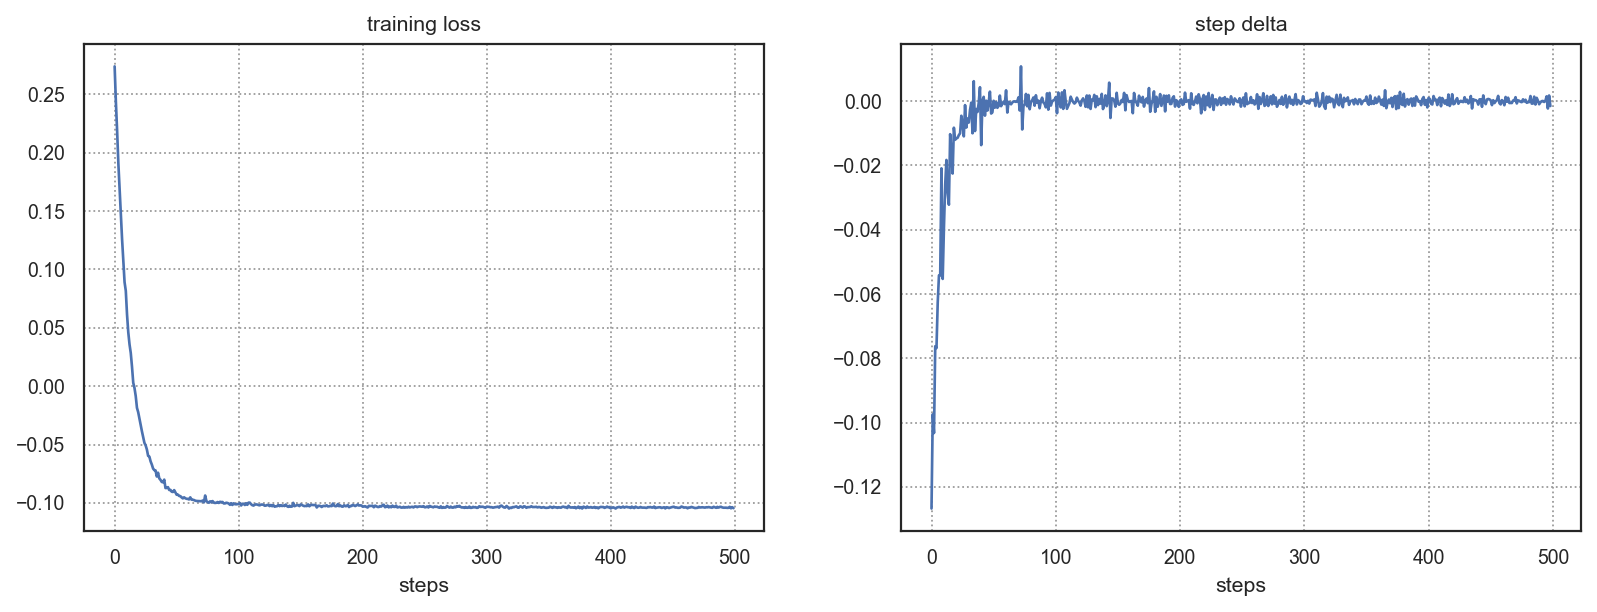

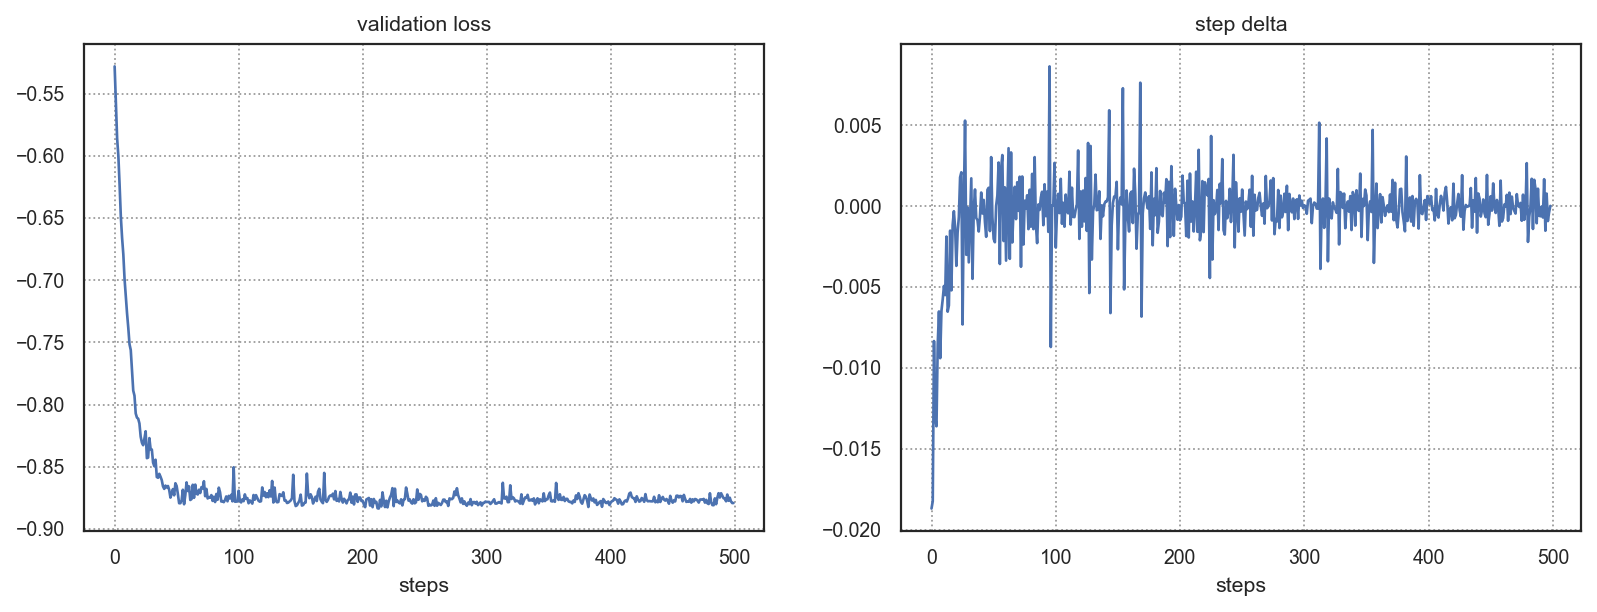

2024-12-06 10:58:50,238 | INFO : Saving echidna model with run_id 20241206-105850.


In [12]:
config = ec.tl.EchidnaConfig(
    timepoint_label = "timepoint", # `assert 'timepoint' in adata.obs.columns`
    counts_layer = "counts", # `assert 'counts' in list(adata.layers.keys())`
    clusters = "leiden", # `assert 'leiden' in adata.obs.columns`
    inverse_gamma = False, # Inverse Gamma False when we have more data
    patience = None, # Increase/decrease to affect early stopping, None for no early stopping (default)
    n_steps = 500,
    val_split = .1,
    learning_rate = .1,
    q_corr_init = 1e-2, # See README.md for model hyperparam descriptions
    q_shape_rate_scaler = 10.0,
    eta_mean_init = 2.0,
    lkj_concentration = 1.0,
)
ec.tl.echidna_train(
     adata # Single-cell AnnData
    , wdf # Copy number  pd.DataFrame, indexed with genes
    , config # Config settings
)

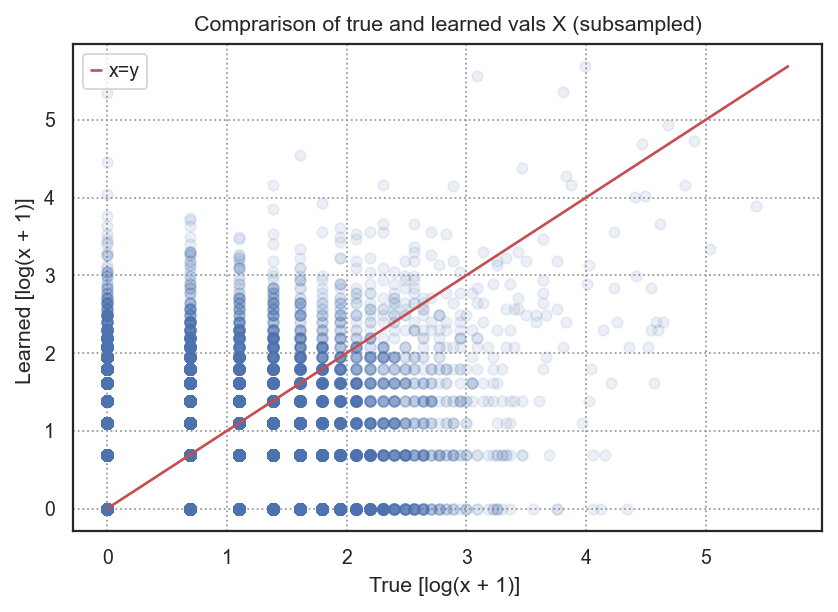

In [6]:
ec.pl.ppc(adata, variable="X")

In [13]:

ec.tl.echidna_clones(adata, threshold=0.1)

/Users/joyfan/Desktop/echidna_analyses/josh stuff/./echidna3/echidna/tools/eval.py:355: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  hier_colors = [color_dict.loc[int(i)][0] for i in adata.obs[cluster_label]]
2024-12-06 11:56:50,776 | INFO : Added `.obs['echidna_clones']`: the learned clones from eta.


In [14]:
ec.tl.echidna_status(adata, threshold=.6)

/Users/joyfan/Desktop/echidna_analyses/josh stuff/./echidna3/echidna/tools/eval.py:417: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clones_gb = adata.obs.groupby(
/Users/joyfan/Desktop/echidna_analyses/josh stuff/./echidna3/echidna/tools/eval.py:422: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tp_gb = clones_gb.groupby(
/Users/joyfan/Desktop/echidna_analyses/josh stuff/./echidna3/echidna/tools/eval.py:460: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future 

In [19]:
#create dict of pre source nodes
pre_clones={}
treatment = adata.obs["sample"]
clonality = adata.obs["echidna_clones"]
for i in range(len(treatment)):
    if treatment[i]=='R310_pre':
        if clonality[i]!=-1:
            if clonality[i] in pre_clones:
                #pre_clones[clonality[i]]=pre_clones[clonality[i]]+[r310.obs_names[i]]
                pre_clones[clonality[i]]=pre_clones[clonality[i]]+1
            else:
                #pre_clones[clonality[i]]=[r310.obs_names[i]]
                pre_clones[clonality[i]]=1

/var/folders/ls/bynfxvkd45n7qyly8qv285pm0000gn/T/ipykernel_7086/3891672227.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if treatment[i]=='R310_pre':
/var/folders/ls/bynfxvkd45n7qyly8qv285pm0000gn/T/ipykernel_7086/3891672227.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if clonality[i]!=-1:
/var/folders/ls/bynfxvkd45n7qyly8qv285pm0000gn/T/ipykernel_7086/3891672227.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if cl

In [20]:
#create dict of on later nodes
later_clones={}
for i in range(len(treatment)):
    if treatment[i]=='R310_on2':
        if clonality[i]!=-1:
            if clonality[i] in later_clones:
                later_clones[clonality[i]]=later_clones[clonality[i]]+1
            else:
                later_clones[clonality[i]]=1


/var/folders/ls/bynfxvkd45n7qyly8qv285pm0000gn/T/ipykernel_7086/1311853550.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if treatment[i]=='R310_on2':
/var/folders/ls/bynfxvkd45n7qyly8qv285pm0000gn/T/ipykernel_7086/1311853550.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if clonality[i]!=-1:
/var/folders/ls/bynfxvkd45n7qyly8qv285pm0000gn/T/ipykernel_7086/1311853550.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if cl

In [21]:
clone_by_time={}
for i in np.unique(clonality):
    if i in pre_clones:
        clone_by_time[str(i)]=[pre_clones[i]/np.sum(list(pre_clones.values()))]
    else:
        clone_by_time[str(i)]=[0]
        
    if i in later_clones:
        clone_by_time[str(i)]=clone_by_time[str(i)]+[later_clones[i]/np.sum(list(later_clones.values()))]
    else:
        clone_by_time[str(i)]=clone_by_time[str(i)]+[0]

2024-12-07 18:42:42,988 | INFO : maxp pruned
2024-12-07 18:42:42,989 | INFO : LTSH dropped
2024-12-07 18:42:42,990 | INFO : cmap pruned
2024-12-07 18:42:42,991 | INFO : kern dropped
2024-12-07 18:42:42,994 | INFO : post pruned
2024-12-07 18:42:42,995 | INFO : PCLT dropped
2024-12-07 18:42:42,995 | INFO : JSTF dropped
2024-12-07 18:42:42,996 | INFO : DSIG dropped
2024-12-07 18:42:42,998 | INFO : GPOS pruned
2024-12-07 18:42:42,999 | INFO : GSUB pruned
2024-12-07 18:42:43,001 | INFO : glyf pruned
2024-12-07 18:42:43,003 | INFO : Added gid0 to subset
2024-12-07 18:42:43,003 | INFO : Added first four glyphs to subset
2024-12-07 18:42:43,003 | INFO : Closing glyph list over 'GSUB': 33 glyphs before
2024-12-07 18:42:43,004 | INFO : Glyph names: ['.notdef', '.null', 'C', 'I', 'N', 'P', 'T', 'V', 'a', 'c', 'd', 'e', 'eight', 'f', 'four', 'i', 'l', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'period', 'r', 's', 'six', 'space', 't', 'three', 'two', 'y', 'zero']
2024-12-07 18:42:43,004 | INFO 

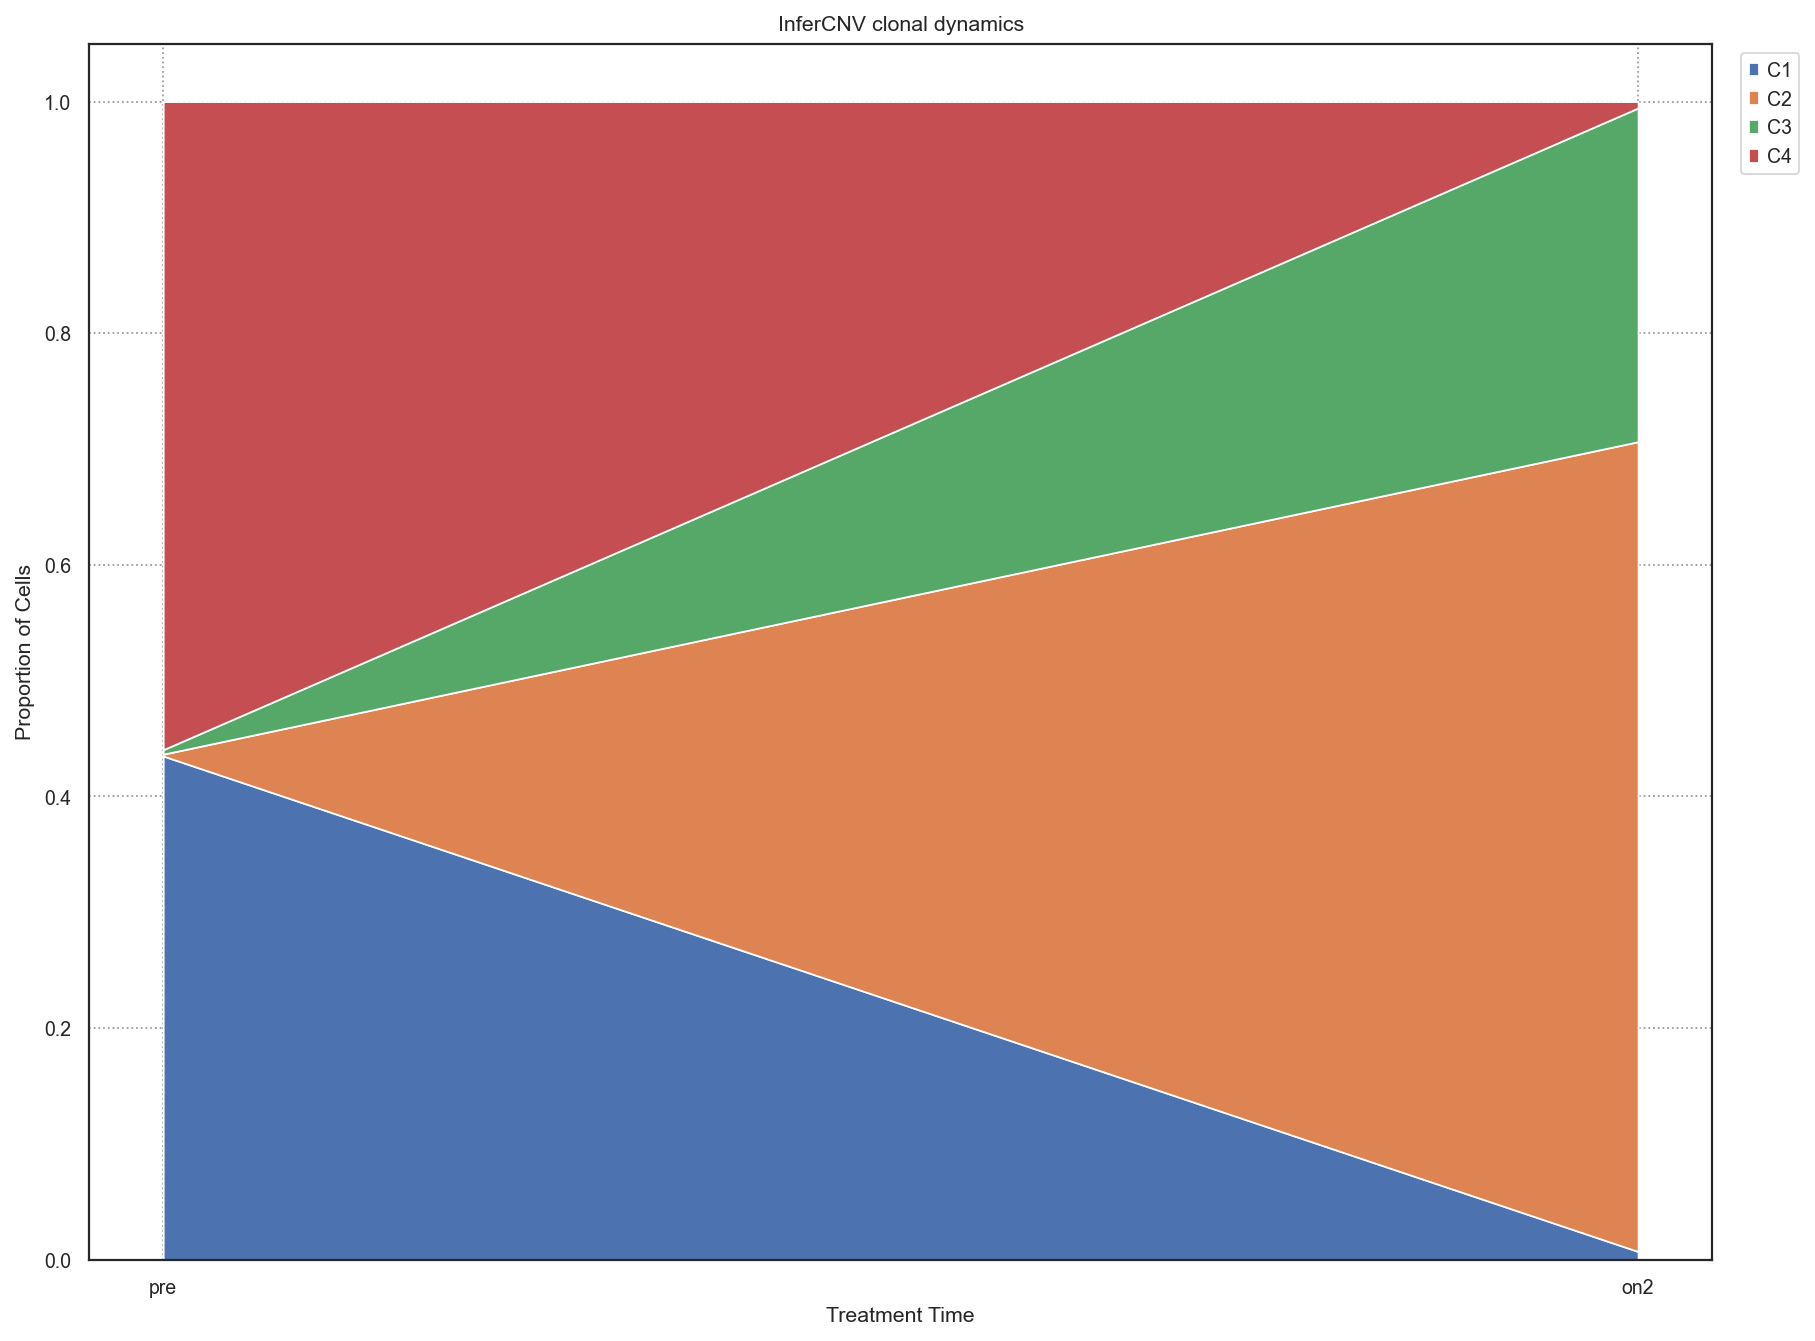

In [27]:
times = ["pre","on2"]


fig, ax = plt.subplots(figsize=(13,10))
ax.stackplot(times, clone_by_time.values(),
             labels=clone_by_time.keys())
ax.legend(loc='upper right', bbox_to_anchor=(1.06, 1))
ax.set_title('InferCNV clonal dynamics')
ax.set_xlabel('Treatment Time')
ax.set_ylabel('Proportion of Cells')

plt.savefig("FIGURES/dynamics.pdf",dpi=300, format='pdf')

plt.show()

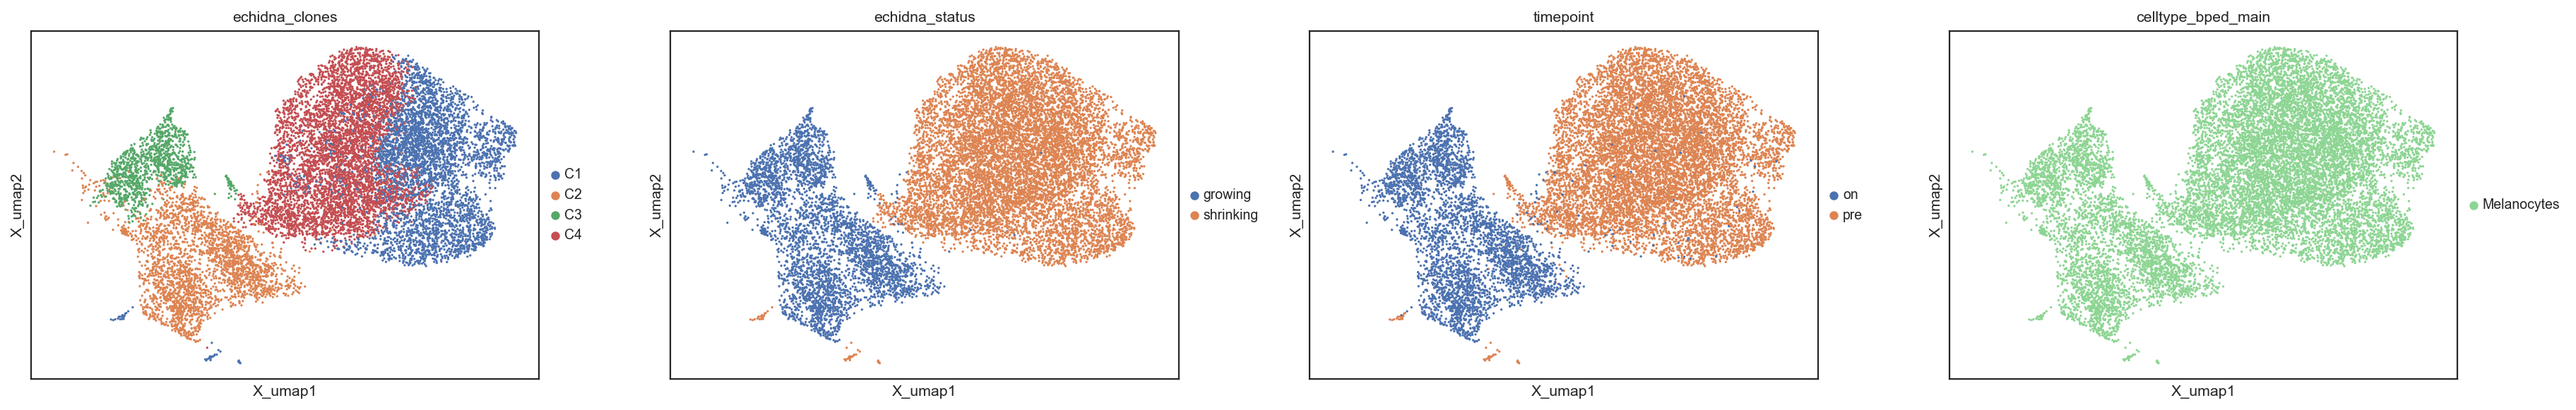

In [47]:
ec.pl.echidna(adata, ["echidna_clones", "echidna_status", "timepoint","celltype_bped_main"])

In [25]:
adata.write_h5ad("r310_joy_run.h5")

In [48]:
adata = sc.read_h5ad("hmm_all_pt/F12/F12_X.h5")

In [49]:
# Plot using seaborn
sns.set(font_scale = 1.7)

2025-03-18 14:34:03,002 | INFO : `genome` not set, defaulting to hg38wgEncodeGencodeCompV46.


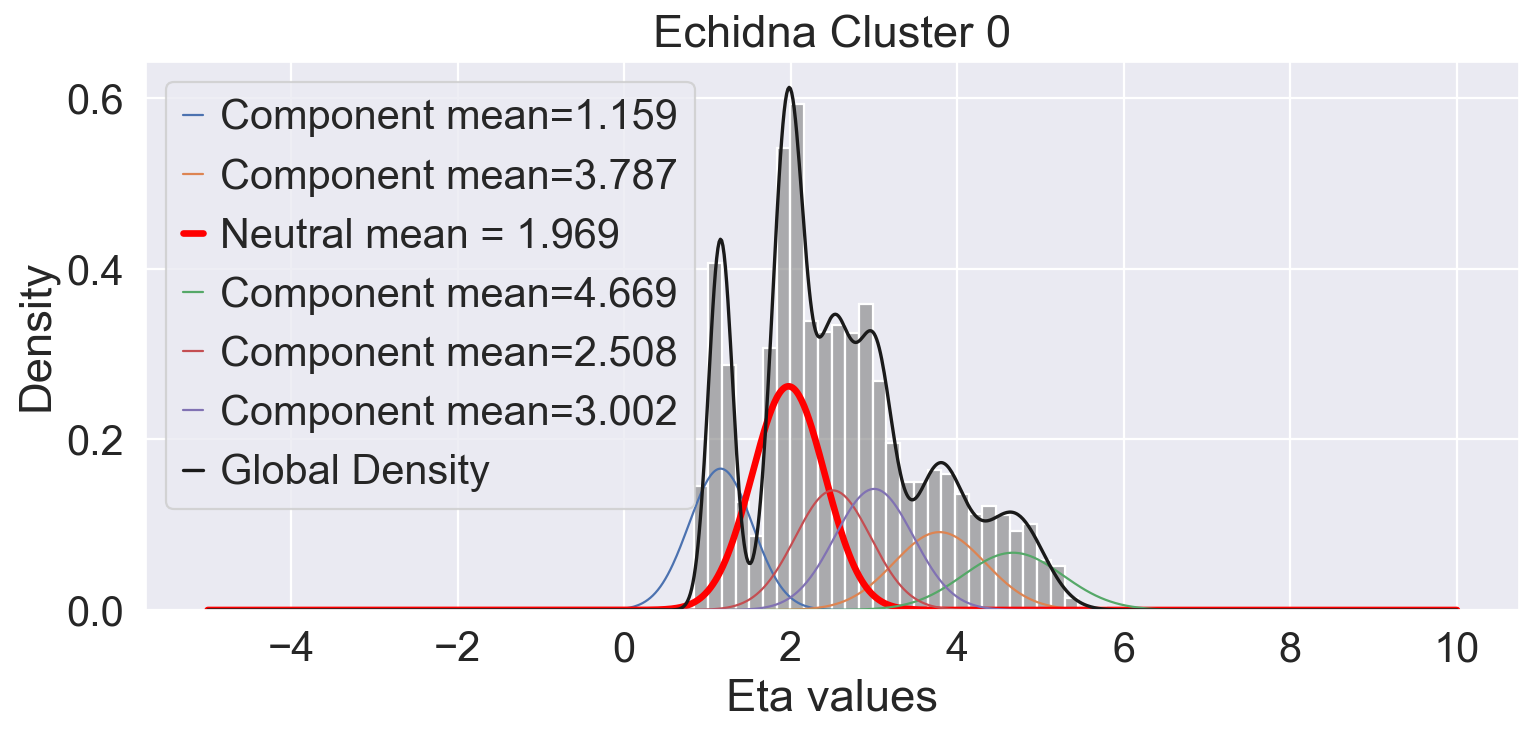

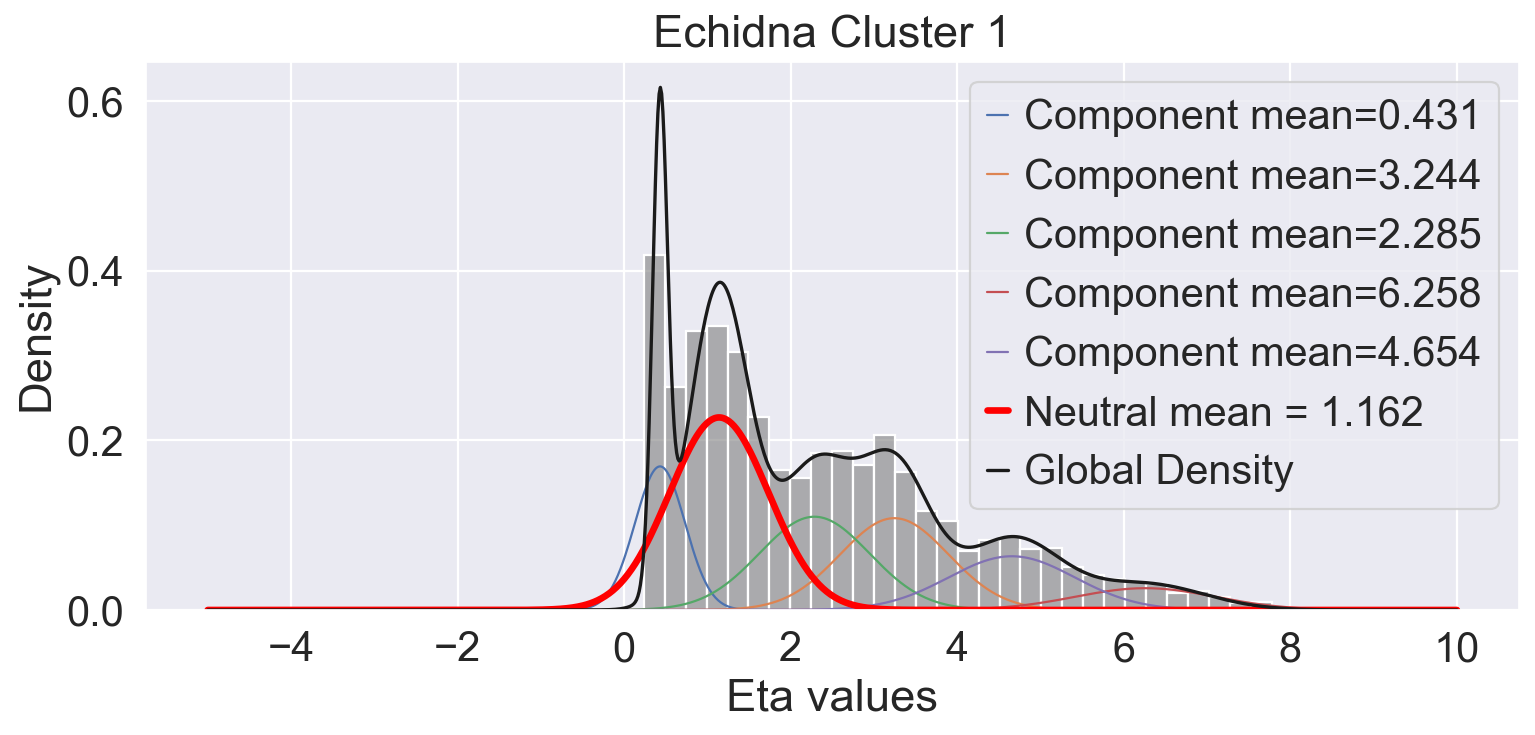

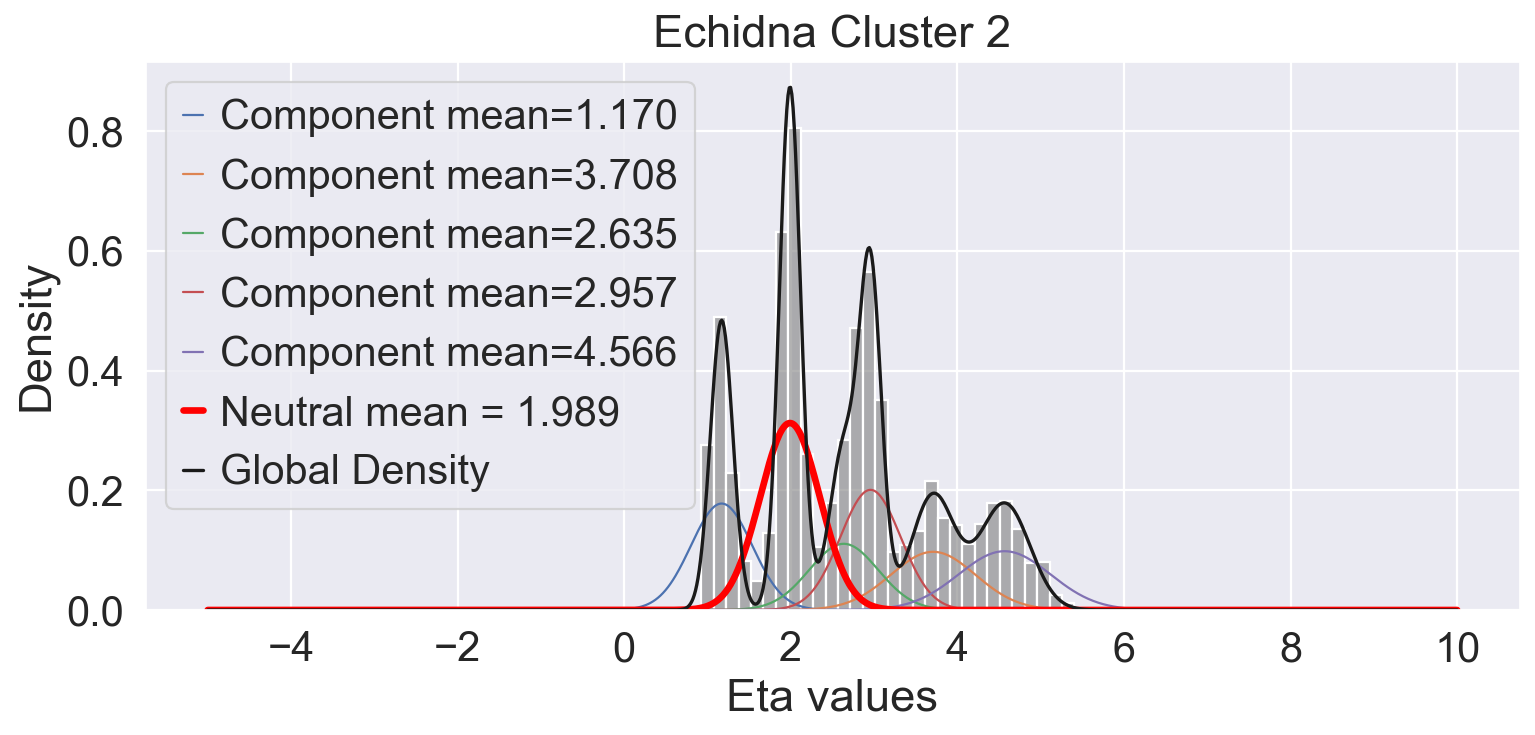

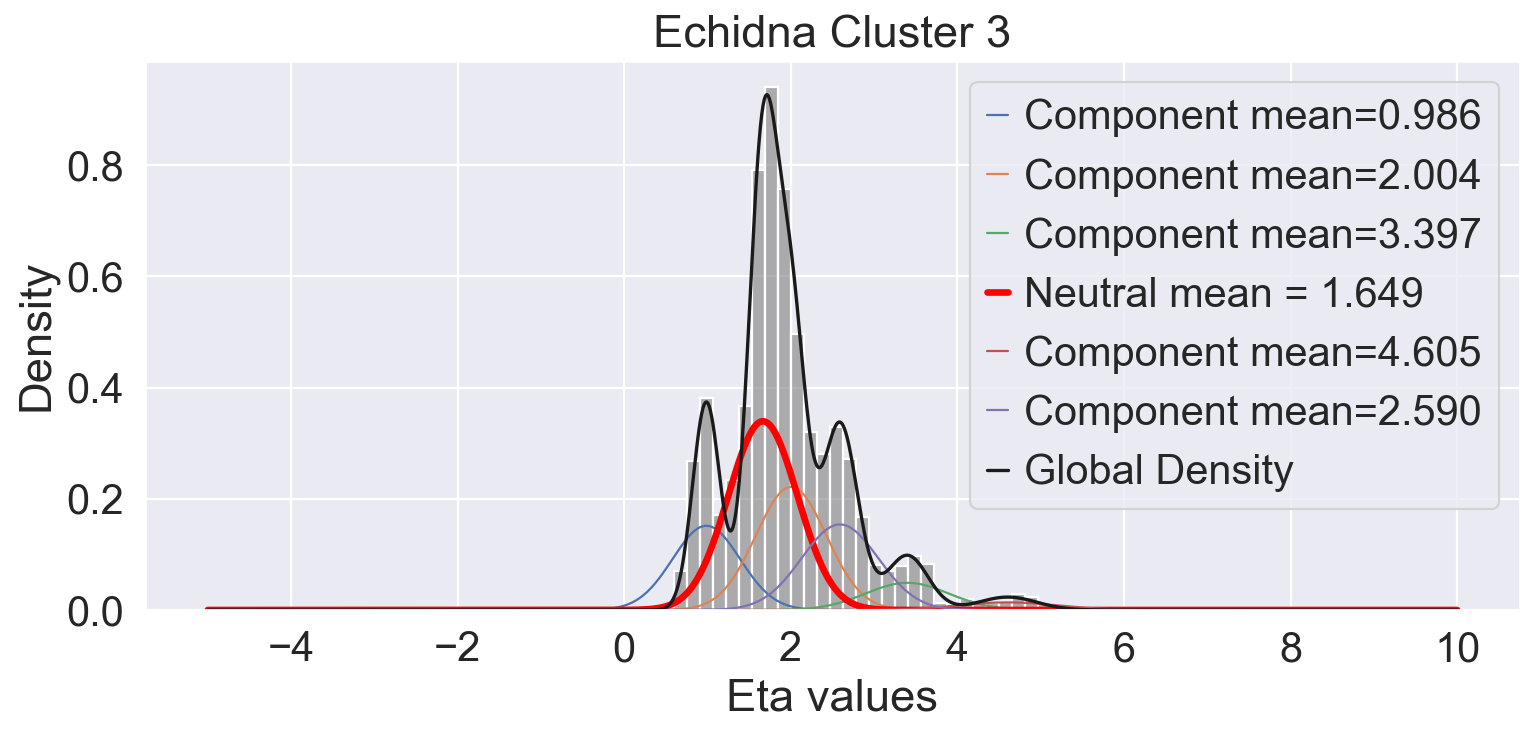

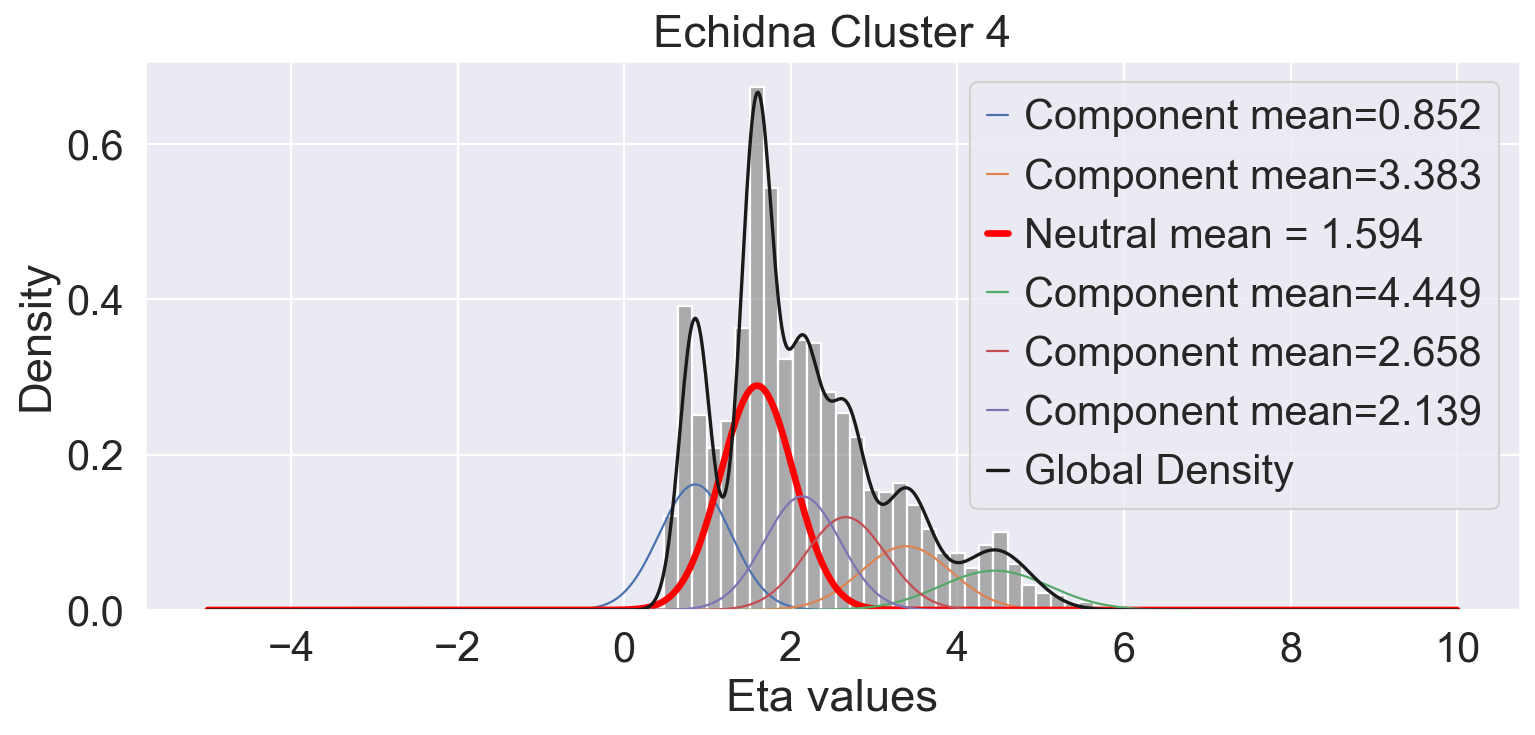

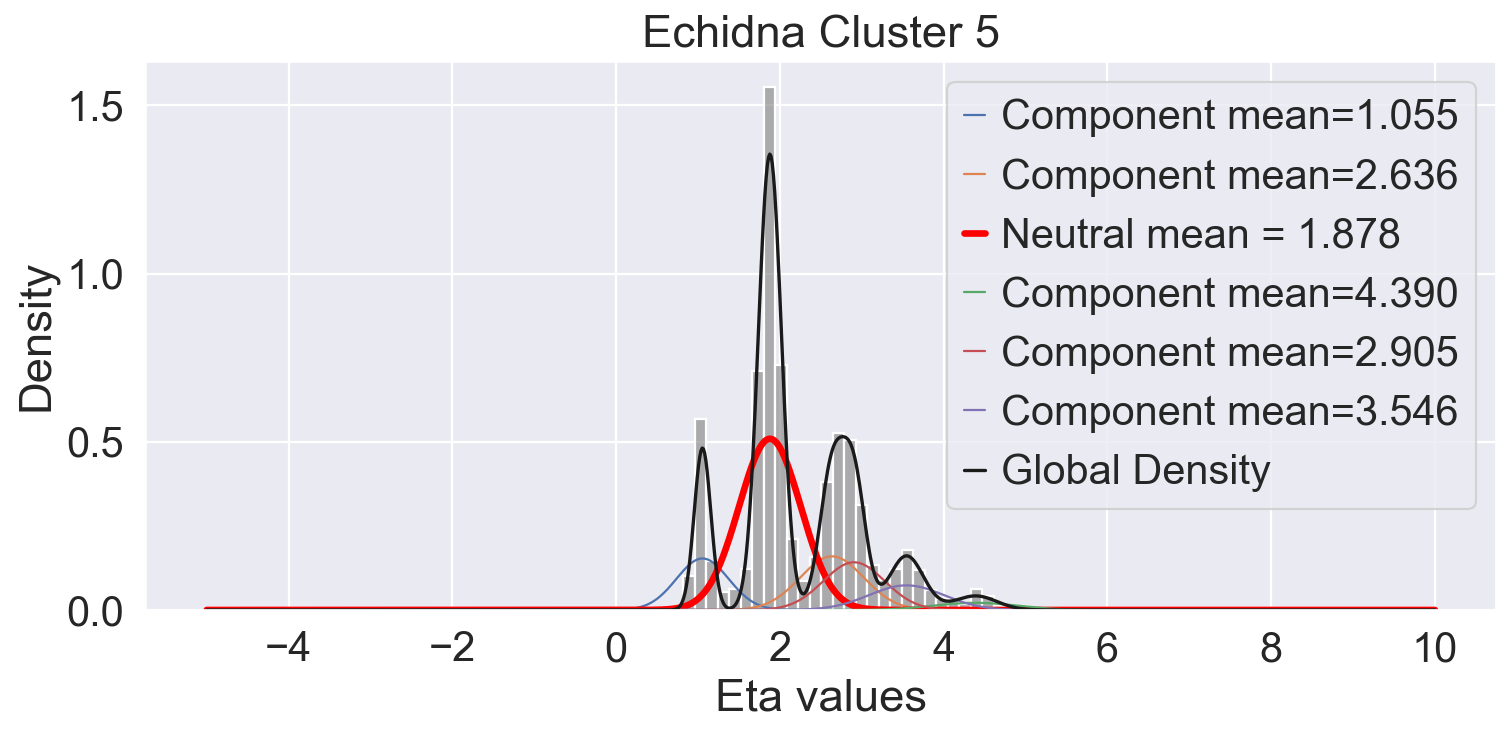

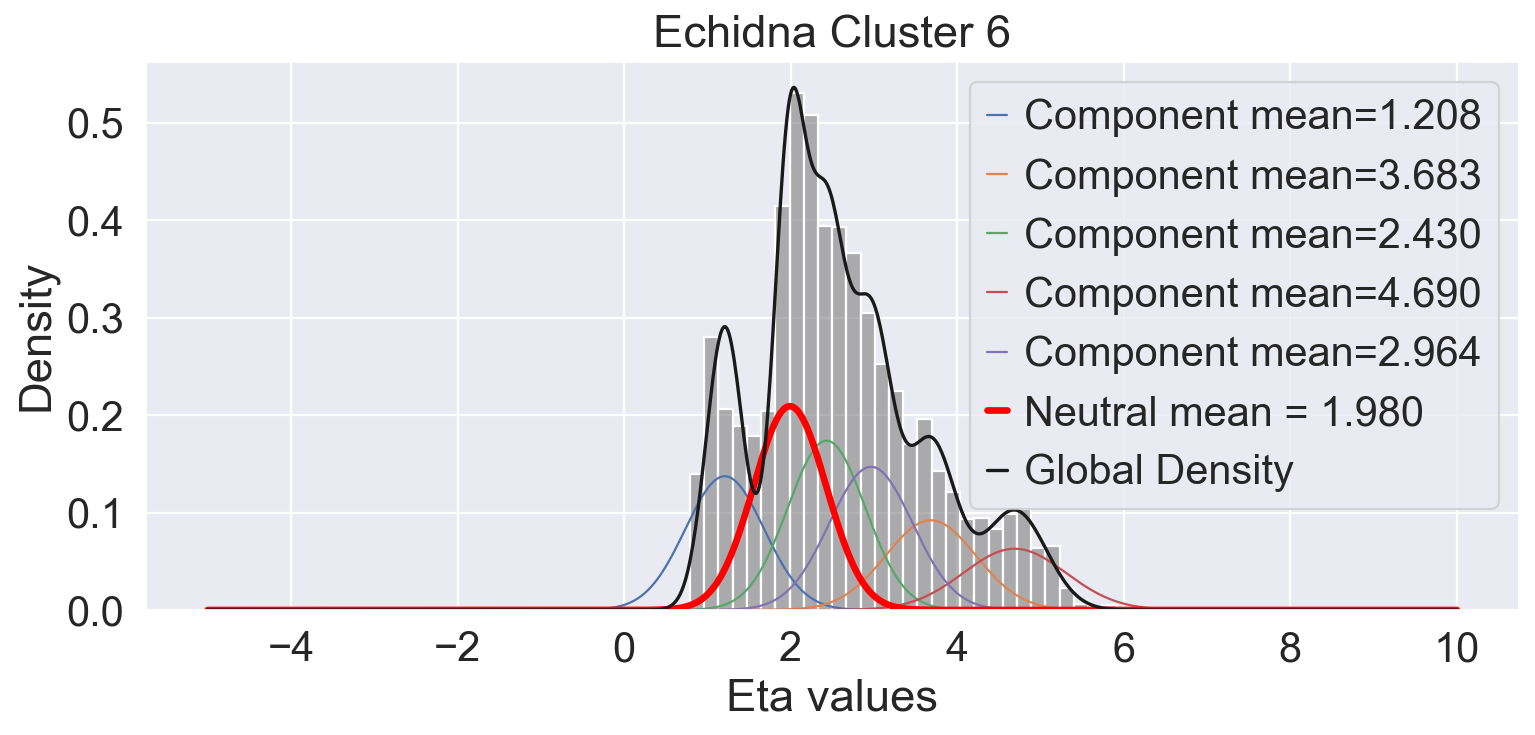

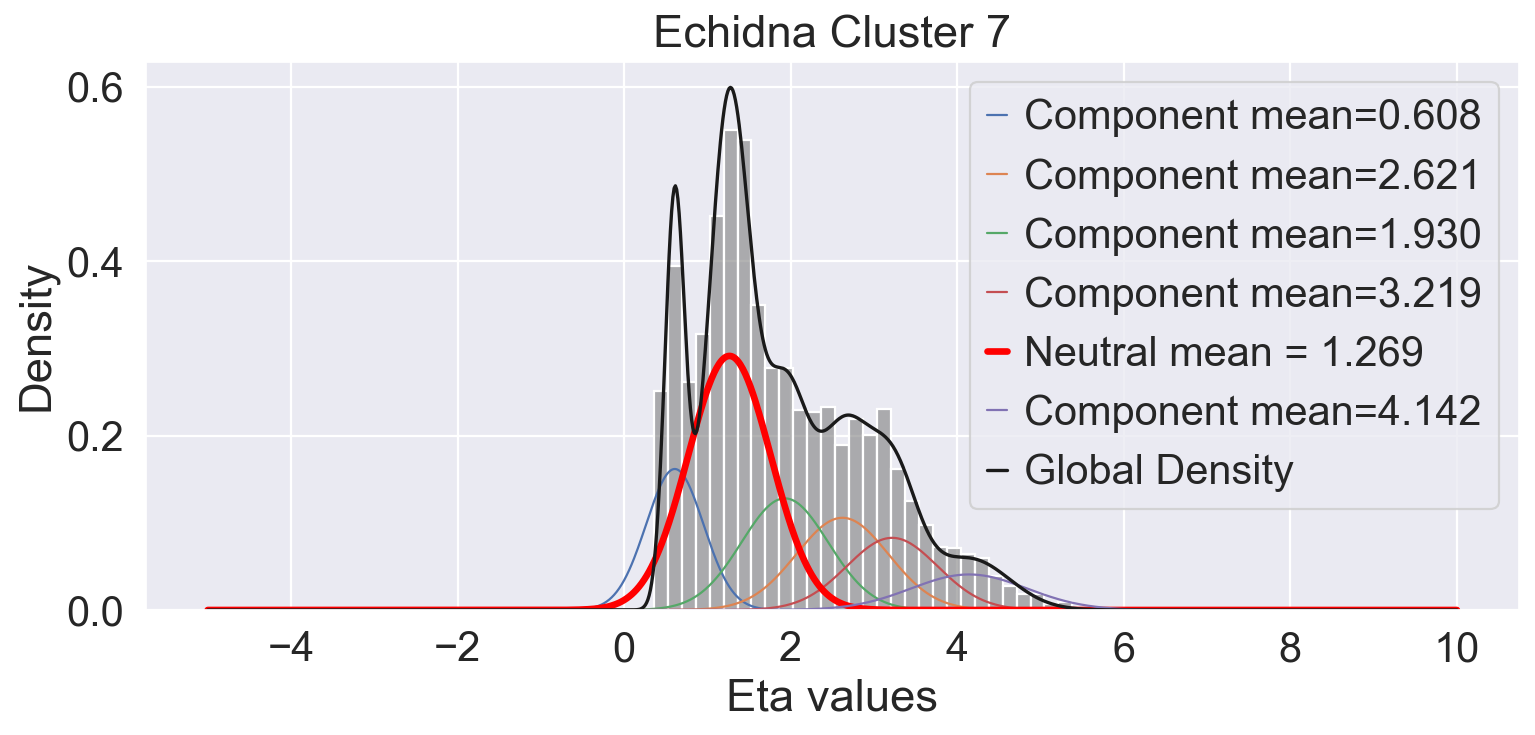

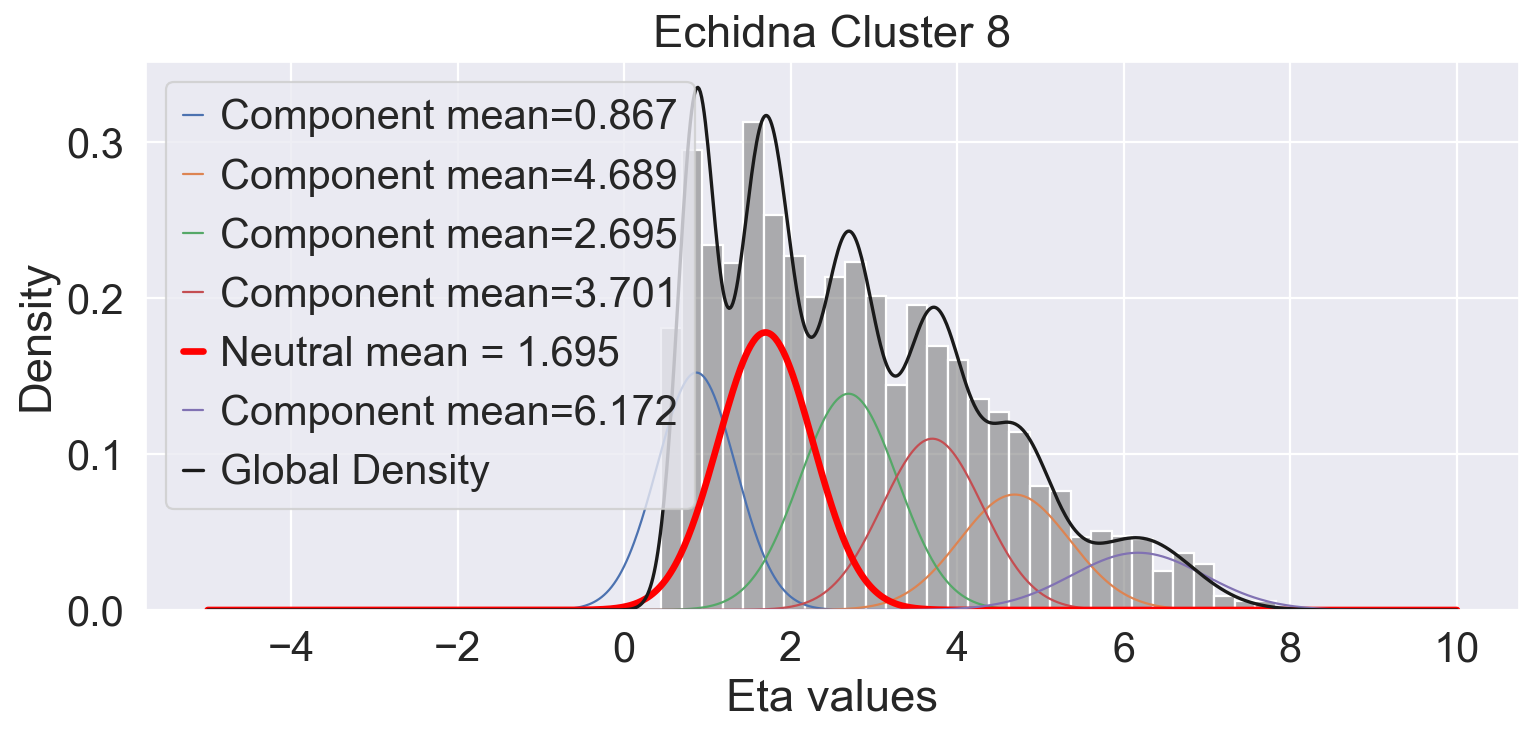

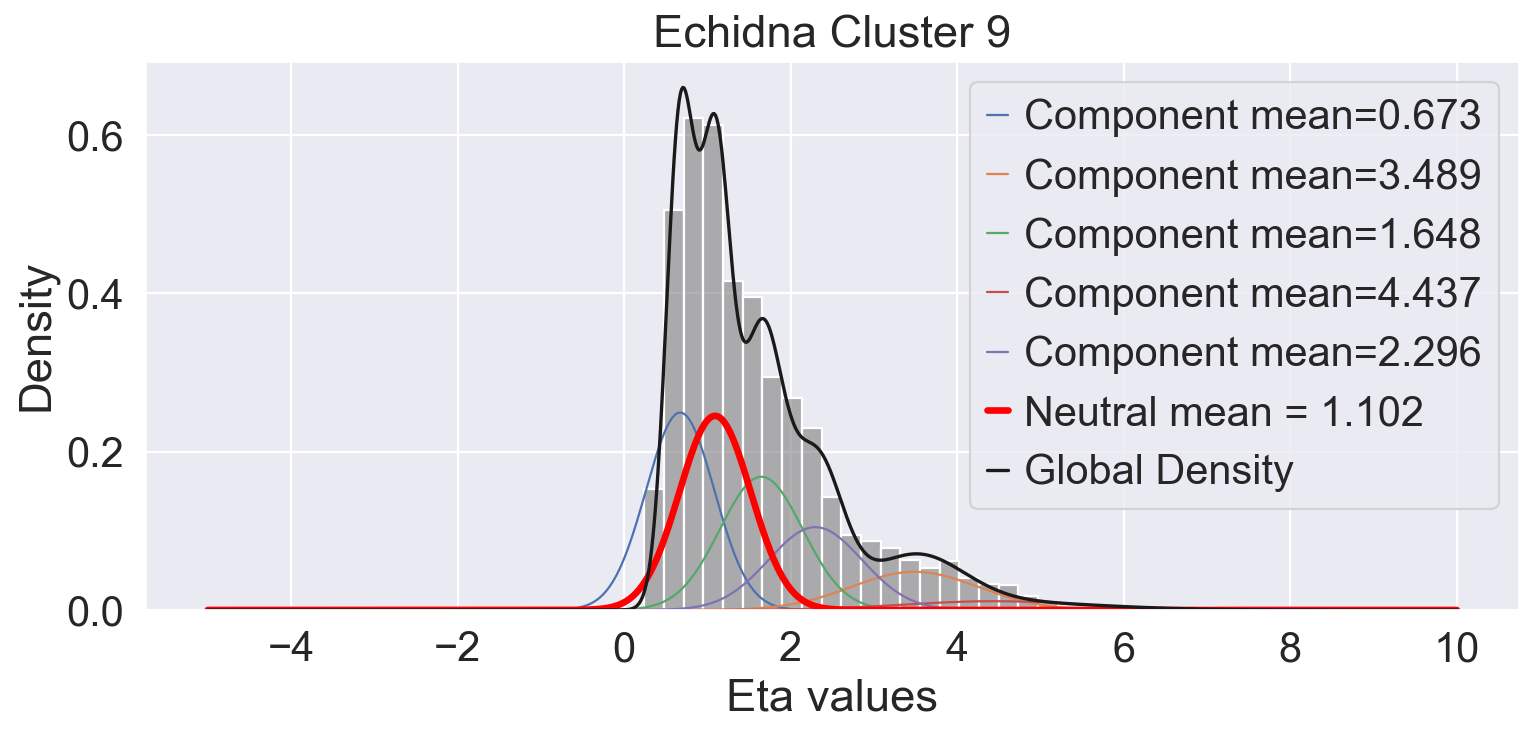

2025-03-18 14:34:59,513 | INFO : Added `.uns['echidna']['save_data']['echi_cnv']` : Path to CNV inference results.
Added `.uns['echidna']['save_data']['gmm_neutrals']` : Path to Echidna cluster neutral value results.


In [52]:
ec.tl.echi_cnv(adata, plot_gmm=True, n_gmm_components=6)

In [76]:
plt.rcParams.update({'font.size': 18})

/Users/joyfan/Desktop/echidna_analyses/josh stuff/./echidna3/echidna/plot/post.py:122: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ticks = [(chrom_counts[i-1] + chrom_counts[i])/2 if i != 0 else chrom_counts[i]/2 for i in range(len(chrom_counts))]
2024-12-08 16:33:17,271 | INFO : maxp pruned
2024-12-08 16:33:17,272 | INFO : LTSH dropped
2024-12-08 16:33:17,272 | INFO : cmap pruned
2024-12-08 16:33:17,273 | INFO : kern dropped
2024-12-08 16:33:17,275 | INFO : post pruned
2024-12-08 16:33:17,275 | INFO : PCLT dropped
2024-12-08 16:33:17,275 | INFO : JSTF dropped
2024-12-08 16:33:17,276 | INFO : DSIG dropped
2024-12-08 16:33:17,278 | INFO : GPOS pruned
2024-12-08 16:33:17,279 | INFO : GSUB pruned
2024-12-08 16:33:17,281 | INFO : glyf pruned
2024-12-08 16:33:17,283 | INFO : Added gid0 to subset
2024-12-

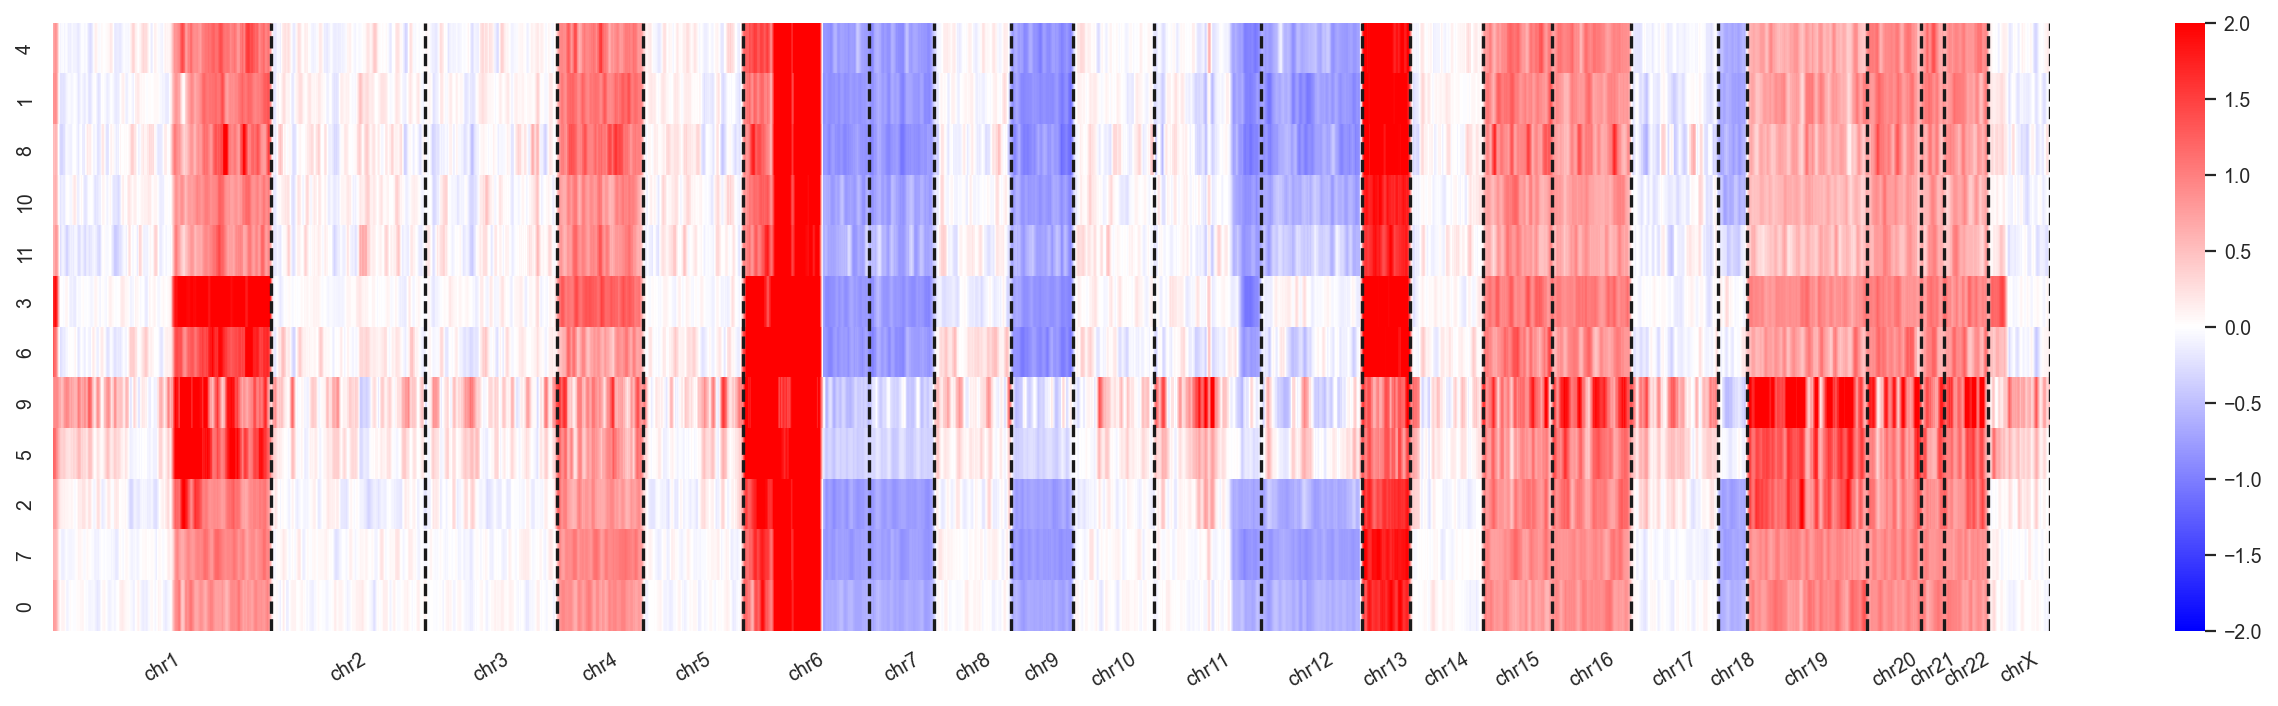

In [35]:
ec.pl.plot_cnv(adata)
plt.savefig("FIGURES/hmm.pdf",dpi=300)

/Users/joyfan/Desktop/echidna_analyses/josh stuff/./echidna3/echidna/plot/post.py:52: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ticks = [(chrom_counts[i-1] + chrom_counts[i])/2 if i != 0 else chrom_counts[i]/2 for i in range(len(chrom_counts))]
2024-12-07 12:57:21,247 | INFO : maxp pruned
2024-12-07 12:57:21,248 | INFO : LTSH dropped
2024-12-07 12:57:21,249 | INFO : cmap pruned
2024-12-07 12:57:21,249 | INFO : kern dropped
2024-12-07 12:57:21,251 | INFO : post pruned
2024-12-07 12:57:21,252 | INFO : PCLT dropped
2024-12-07 12:57:21,252 | INFO : JSTF dropped
2024-12-07 12:57:21,252 | INFO : DSIG dropped
2024-12-07 12:57:21,254 | INFO : GPOS pruned
2024-12-07 12:57:21,255 | INFO : GSUB pruned
2024-12-07 12:57:21,257 | INFO : glyf pruned
2024-12-07 12:57:21,259 | INFO : Added gid0 to subset
2024-12-0

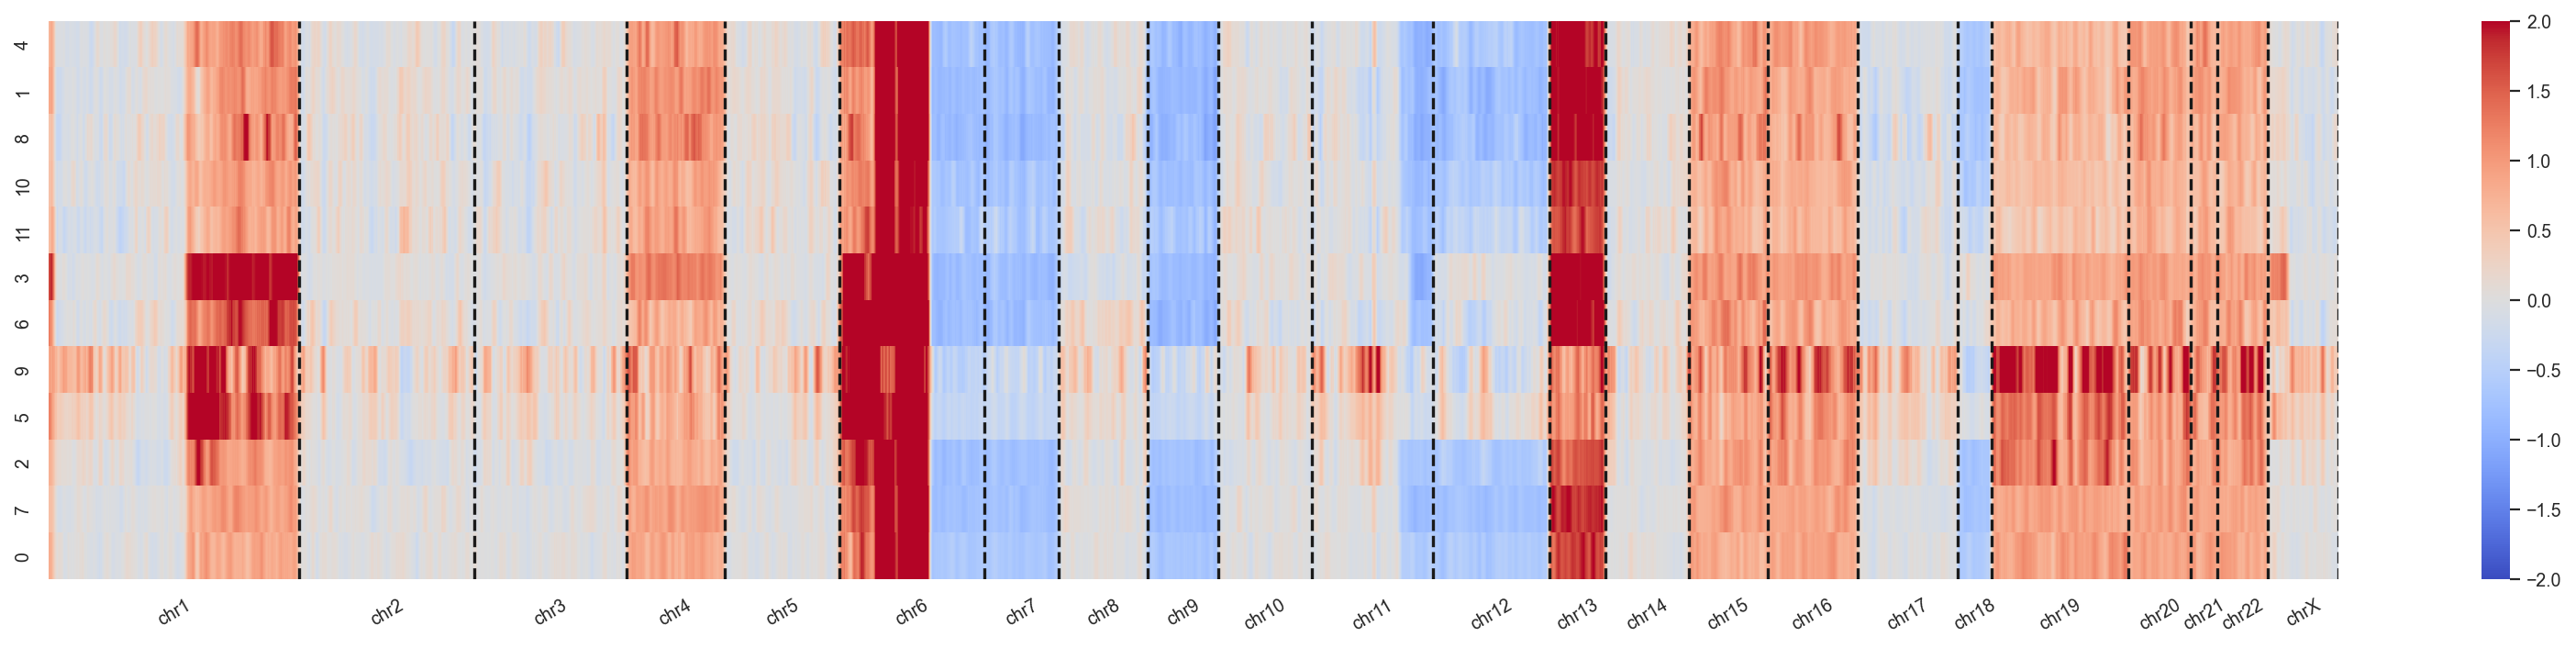

In [36]:
ec.pl.plot_eta(adata)
plt.savefig("FIGURES/eta_data.pdf",dpi=300)

In [4]:
eta = ec.tl.cnv_results(adata)

cnvs = eta[[i for i in eta.columns if "clone" in i and "states" not in i]]

states = eta[[i for i in eta.columns if "states" in i]]

cnvs.columns = [i.split("_")[2] for i in cnvs.columns]
cnvs.columns = ["R310_"+i for i in cnvs.columns]

states.columns = [i.split("_")[3] for i in states.columns]
states.columns = ["R310_"+i for i in states.columns]

In [19]:
states.to_csv("r310_states")

In [7]:
status = pd.read_csv("echidna_clone_status.8.1.24.csv", index_col=0).dropna().T
status.columns = ["status"]

In [8]:
status = status.loc[cnvs.columns]

In [13]:
patient="R310"
states = pd.read_csv("hmm_all_pt/"+patient+"/"+patient+"_states_new.csv", index_col=0).T

In [14]:
cnvs_shrink = cnvs[status[status.status=="shrinking"].index]
states_shrink = states[status[status.status=="shrinking"].index]

In [15]:
cnvs_grow = cnvs[status[status.status=="growing"].index]
states_grow = states[status[status.status=="growing"].index]

In [11]:
ec.tl.gene_dosage_effect(adata)

2024-12-08 15:35:04,255 | INFO : Added `.uns['echidna']['save_data']['gene_dosage']` : Path to gene dosage effect results.


In [337]:
sns.set(font_scale = 1.2)

In [54]:
reconstruct_W = ec.tl.eval.sample_W(adata)

In [58]:
reconstruct_W = pd.DataFrame(reconstruct_W, columns=adata.var_names)

In [331]:
reconstruct_W = reconstruct_W.dropna()
neut = [find_neutrals(list(reconstruct_W.T[0]))]

In [332]:
neut = neut+[find_neutrals(list(reconstruct_W.T[1]))]

In [333]:
delta_wgs = pd.DataFrame()
for cluster in reconstruct_W.index:
    delta_wgs[cluster]=np.asarray(reconstruct_W.loc[cluster])-neut[cluster]
delta_wgs.index = reconstruct_W.columns

In [334]:
draw_lines, chr_list, genes = eta_no_bin(delta_wgs)

In [335]:
delta_wgs = delta_wgs.loc[genes]

2024-12-14 10:22:37,909 | INFO : maxp pruned
2024-12-14 10:22:37,909 | INFO : LTSH dropped
2024-12-14 10:22:37,910 | INFO : cmap pruned
2024-12-14 10:22:37,911 | INFO : kern dropped
2024-12-14 10:22:37,913 | INFO : post pruned
2024-12-14 10:22:37,914 | INFO : PCLT dropped
2024-12-14 10:22:37,914 | INFO : JSTF dropped
2024-12-14 10:22:37,914 | INFO : DSIG dropped
2024-12-14 10:22:37,917 | INFO : GPOS pruned
2024-12-14 10:22:37,918 | INFO : GSUB pruned
2024-12-14 10:22:37,921 | INFO : glyf pruned
2024-12-14 10:22:37,923 | INFO : Added gid0 to subset
2024-12-14 10:22:37,924 | INFO : Added first four glyphs to subset
2024-12-14 10:22:37,924 | INFO : Closing glyph list over 'GSUB': 23 glyphs before
2024-12-14 10:22:37,924 | INFO : Glyph names: ['.notdef', '.null', 'X', 'c', 'e', 'eight', 'five', 'four', 'h', 'minus', 'n', 'nine', 'nonmarkingreturn', 'o', 'one', 'p', 'r', 'seven', 'six', 'space', 'three', 'two', 'zero']
2024-12-14 10:22:37,925 | INFO : Glyph IDs:   [0, 1, 2, 3, 19, 20, 21, 2

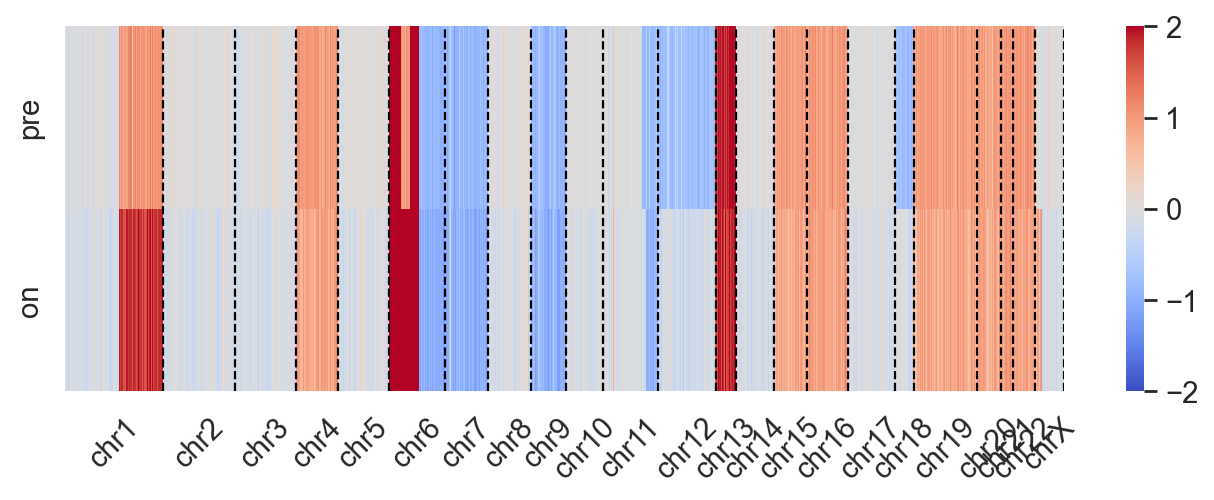

In [338]:
plt.figure(figsize=(10,3))
sns.heatmap(delta_wgs.T, cmap='coolwarm', vmax=2, vmin=-2)

plt.yticks([.5,1.5],labels=["pre","on"])
ticklines = []
for i in range(len(draw_lines)):
    plt.axvline(x=draw_lines[i], color='black', linestyle='--', linewidth=1)
    if i==0:
        ticklines.append(draw_lines[i]-.5*draw_lines[0])
        #plt.text(draw_lines[i]-.5*draw_lines[0], delta_wgs.T.shape[0]+.4, chr_list[i], color='black', fontsize=10, rotation=45)
    else:
        ticklines.append(draw_lines[i-1]+.5*(draw_lines[i]-draw_lines[i-1]))
        #plt.text(draw_lines[i-1]+.5*(draw_lines[i]-draw_lines[i-1]), delta_wgs.T.shape[0]+.4, chr_list[i], color='black', fontsize=10, rotation=45)
plt.xticks(ticklines, labels=chr_list, rotation=45)
plt.xlabel(None)
plt.savefig("FIGURES1/WGS_reconstruct.pdf",dpi=300)

In [ ]:
wdf = wdf.dropna()

In [324]:
#since this is ichor outputs the neutral returns as 2 for both pre and on so no need for shifting (just adjust colorbar)
neut = [find_neutrals(list(wdf['R310_pre_count']))]
neut = neut + [find_neutrals(list(wdf['R310_on2_count']))]

In [325]:
wdf = wdf.T

In [326]:
delta_wgs = pd.DataFrame()
for n, cluster in enumerate(wdf.index):
    delta_wgs[cluster]=np.asarray(wdf.loc[cluster])-neut[n]
delta_wgs.index = wdf.columns

In [327]:
draw_lines, chr_list, genes = eta_no_bin(delta_wgs)

In [328]:
delta_wgs = delta_wgs.loc[genes]

2024-12-14 10:17:37,555 | INFO : maxp pruned
2024-12-14 10:17:37,555 | INFO : LTSH dropped
2024-12-14 10:17:37,556 | INFO : cmap pruned
2024-12-14 10:17:37,556 | INFO : kern dropped
2024-12-14 10:17:37,558 | INFO : post pruned
2024-12-14 10:17:37,559 | INFO : PCLT dropped
2024-12-14 10:17:37,559 | INFO : JSTF dropped
2024-12-14 10:17:37,559 | INFO : DSIG dropped
2024-12-14 10:17:37,561 | INFO : GPOS pruned
2024-12-14 10:17:37,562 | INFO : GSUB pruned
2024-12-14 10:17:37,565 | INFO : glyf pruned
2024-12-14 10:17:37,566 | INFO : Added gid0 to subset
2024-12-14 10:17:37,567 | INFO : Added first four glyphs to subset
2024-12-14 10:17:37,567 | INFO : Closing glyph list over 'GSUB': 23 glyphs before
2024-12-14 10:17:37,567 | INFO : Glyph names: ['.notdef', '.null', 'X', 'c', 'e', 'eight', 'five', 'four', 'h', 'minus', 'n', 'nine', 'nonmarkingreturn', 'o', 'one', 'p', 'r', 'seven', 'six', 'space', 'three', 'two', 'zero']
2024-12-14 10:17:37,567 | INFO : Glyph IDs:   [0, 1, 2, 3, 19, 20, 21, 2

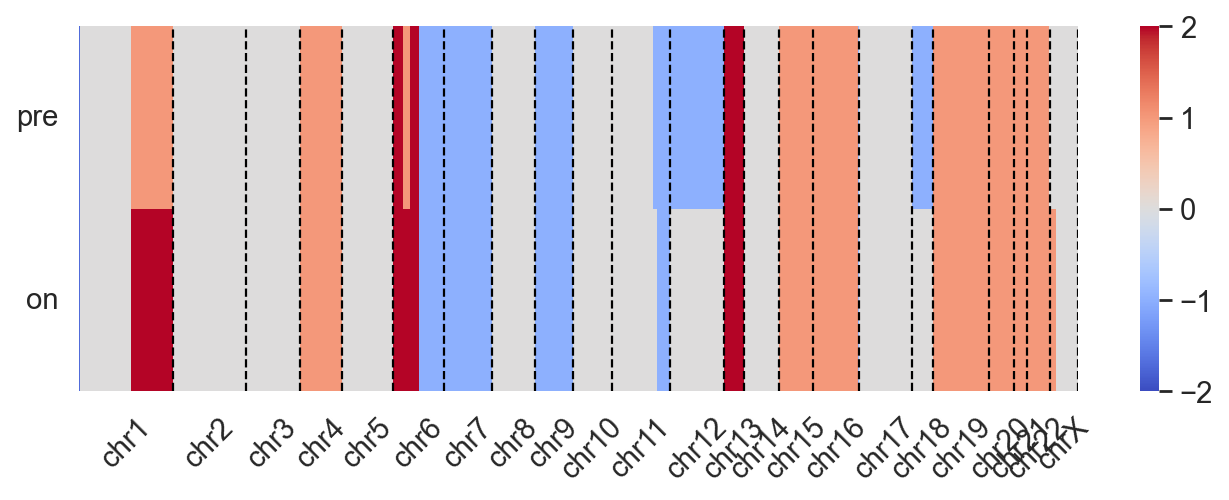

In [329]:
plt.figure(figsize=(10,3))
sns.heatmap(delta_wgs.T, cmap='coolwarm', vmax=2, vmin=-2)

plt.yticks([.5,1.5],labels=["pre","on"])
ticklines = []
for i in range(len(draw_lines)):
    plt.axvline(x=draw_lines[i], color='black', linestyle='--', linewidth=1)
    if i==0:
        ticklines.append(draw_lines[i]-.5*draw_lines[0])
        #plt.text(draw_lines[i]-.5*draw_lines[0], delta_wgs.T.shape[0]+.4, chr_list[i], color='black', fontsize=10, rotation=45)
    else:
        ticklines.append(draw_lines[i-1]+.5*(draw_lines[i]-draw_lines[i-1]))
        #plt.text(draw_lines[i-1]+.5*(draw_lines[i]-draw_lines[i-1]), delta_wgs.T.shape[0]+.4, chr_list[i], color='black', fontsize=10, rotation=45)
plt.xticks(ticklines, labels=chr_list, rotation=45)
plt.xlabel(None)
#plt.savefig("FIGURES1/WGS_observed.pdf",dpi=300)

In [148]:
from hmmlearn import hmm
from sklearn.mixture import GaussianMixture
def find_neutrals(vals_filtered):
    gmm = GaussianMixture(n_components=5)
    
    # Fit the model to the data
    gmm.fit(np.asarray([vals_filtered]).T)
    
    
    # Predict the cluster for each data point
    labels = gmm.predict(np.asarray([vals_filtered]).T)
    
    neut_component = scipy.stats.mode(labels)[0]
    #print(np.unique(labels, return_counts=True))
    gmm_val = pd.DataFrame({"components":labels,"vals":vals_filtered})
    gmm_mean = np.mean(gmm_val[gmm_val["components"]==neut_component]["vals"])
    gmm_std = np.std(gmm_val[gmm_val["components"]==neut_component]["vals"])
    
    return gmm_mean

2024-12-08 16:06:29,257 | INFO : maxp pruned
2024-12-08 16:06:29,258 | INFO : LTSH dropped
2024-12-08 16:06:29,258 | INFO : cmap pruned
2024-12-08 16:06:29,258 | INFO : kern dropped
2024-12-08 16:06:29,261 | INFO : post pruned
2024-12-08 16:06:29,261 | INFO : PCLT dropped
2024-12-08 16:06:29,261 | INFO : JSTF dropped
2024-12-08 16:06:29,261 | INFO : DSIG dropped
2024-12-08 16:06:29,263 | INFO : GPOS pruned
2024-12-08 16:06:29,265 | INFO : GSUB pruned
2024-12-08 16:06:29,267 | INFO : glyf pruned
2024-12-08 16:06:29,268 | INFO : Added gid0 to subset
2024-12-08 16:06:29,269 | INFO : Added first four glyphs to subset
2024-12-08 16:06:29,269 | INFO : Closing glyph list over 'GSUB': 35 glyphs before
2024-12-08 16:06:29,269 | INFO : Glyph names: ['.notdef', '.null', 'C', 'D', 'E', 'G', 'T', 'X', 'a', 'c', 'comma', 'e', 'f', 'five', 'g', 'i', 'l', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'parenleft', 'parenright', 'period', 'r', 's', 'seven', 'space', 't', 'three', 'two', 'u', 'zero']
20

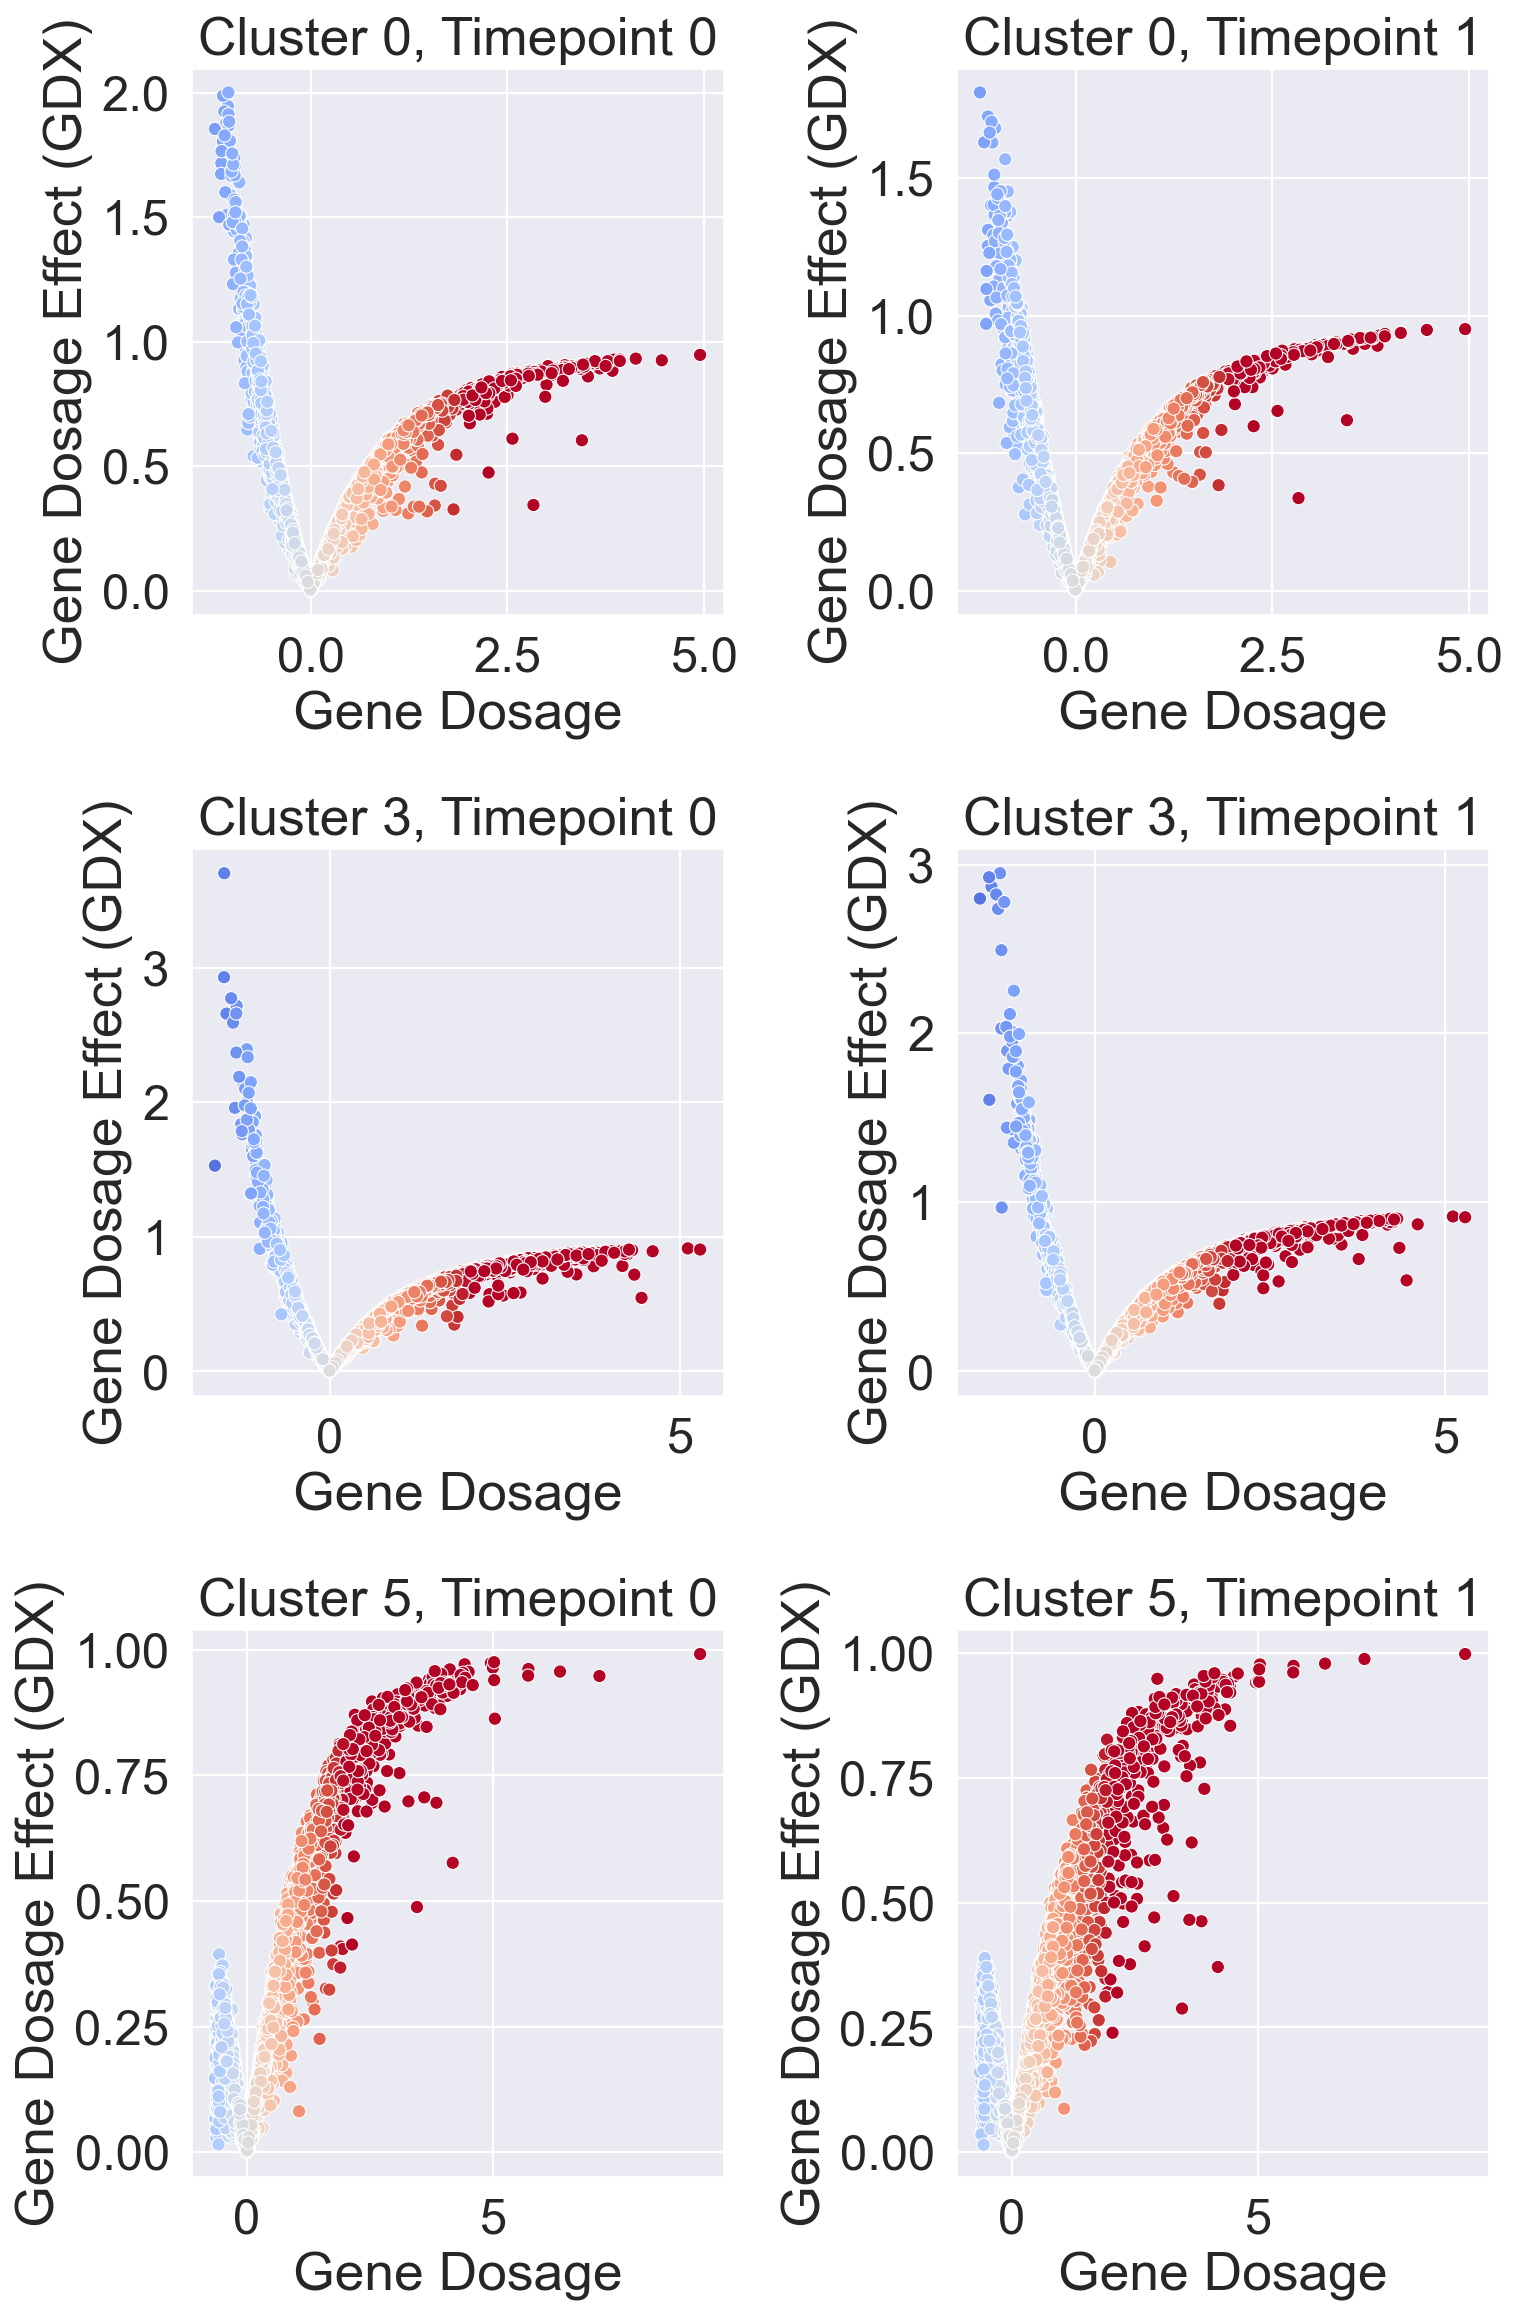

In [14]:
ec.pl.plot_gene_dosage(
    adata, clusters=[0,3,5], timepoints=[0,1], quantile=.8, filename="FIGURES1/gdx_v_plots.pdf"
)

In [18]:
ordered_genes = np.load("ordered_genes.npy")
ordchrs = np.load("ordered_chrs.npy")
pal = {"del":"blue","neut":"grey","amp":"red"}

def eta_no_bin(eta):
    inds = []
    draw_lines = []
    ch = 'chr1'
    chr_list = [ch]
    count=0
    for i in range(len(ordered_genes)):
        if ordered_genes[i] in eta.index:
            inds.append(ordered_genes[i])
            count+=1
            if ordchrs[i]!=ch:
                draw_lines.append(count)
                ch=ordchrs[i]
                chr_list.append(ch)
    draw_lines.append(count)
    return draw_lines, chr_list, inds



In [19]:
sns.set(font_scale = 1.7)
sns.set_style("whitegrid")

In [39]:
len([i for i in ordered_genes if i in states.index])

6778

2025-02-24 11:57:54,348 | INFO : maxp pruned
2025-02-24 11:57:54,349 | INFO : LTSH dropped
2025-02-24 11:57:54,350 | INFO : cmap pruned
2025-02-24 11:57:54,351 | INFO : kern dropped
2025-02-24 11:57:54,353 | INFO : post pruned
2025-02-24 11:57:54,354 | INFO : PCLT dropped
2025-02-24 11:57:54,354 | INFO : JSTF dropped
2025-02-24 11:57:54,355 | INFO : DSIG dropped
2025-02-24 11:57:54,358 | INFO : GPOS pruned
2025-02-24 11:57:54,359 | INFO : GSUB pruned
2025-02-24 11:57:54,362 | INFO : glyf pruned
2025-02-24 11:57:54,363 | INFO : Added gid0 to subset
2025-02-24 11:57:54,364 | INFO : Added first four glyphs to subset
2025-02-24 11:57:54,364 | INFO : Closing glyph list over 'GSUB': 30 glyphs before
2025-02-24 11:57:54,364 | INFO : Glyph names: ['.notdef', '.null', 'C', 'N', 'X', 'b', 'c', 'e', 'eight', 'five', 'four', 'g', 'h', 'i', 'k', 'm', 'n', 'nine', 'nonmarkingreturn', 'o', 'one', 'r', 's', 'seven', 'six', 'space', 'three', 'two', 'underscore', 'zero']
2025-02-24 11:57:54,365 | INFO :

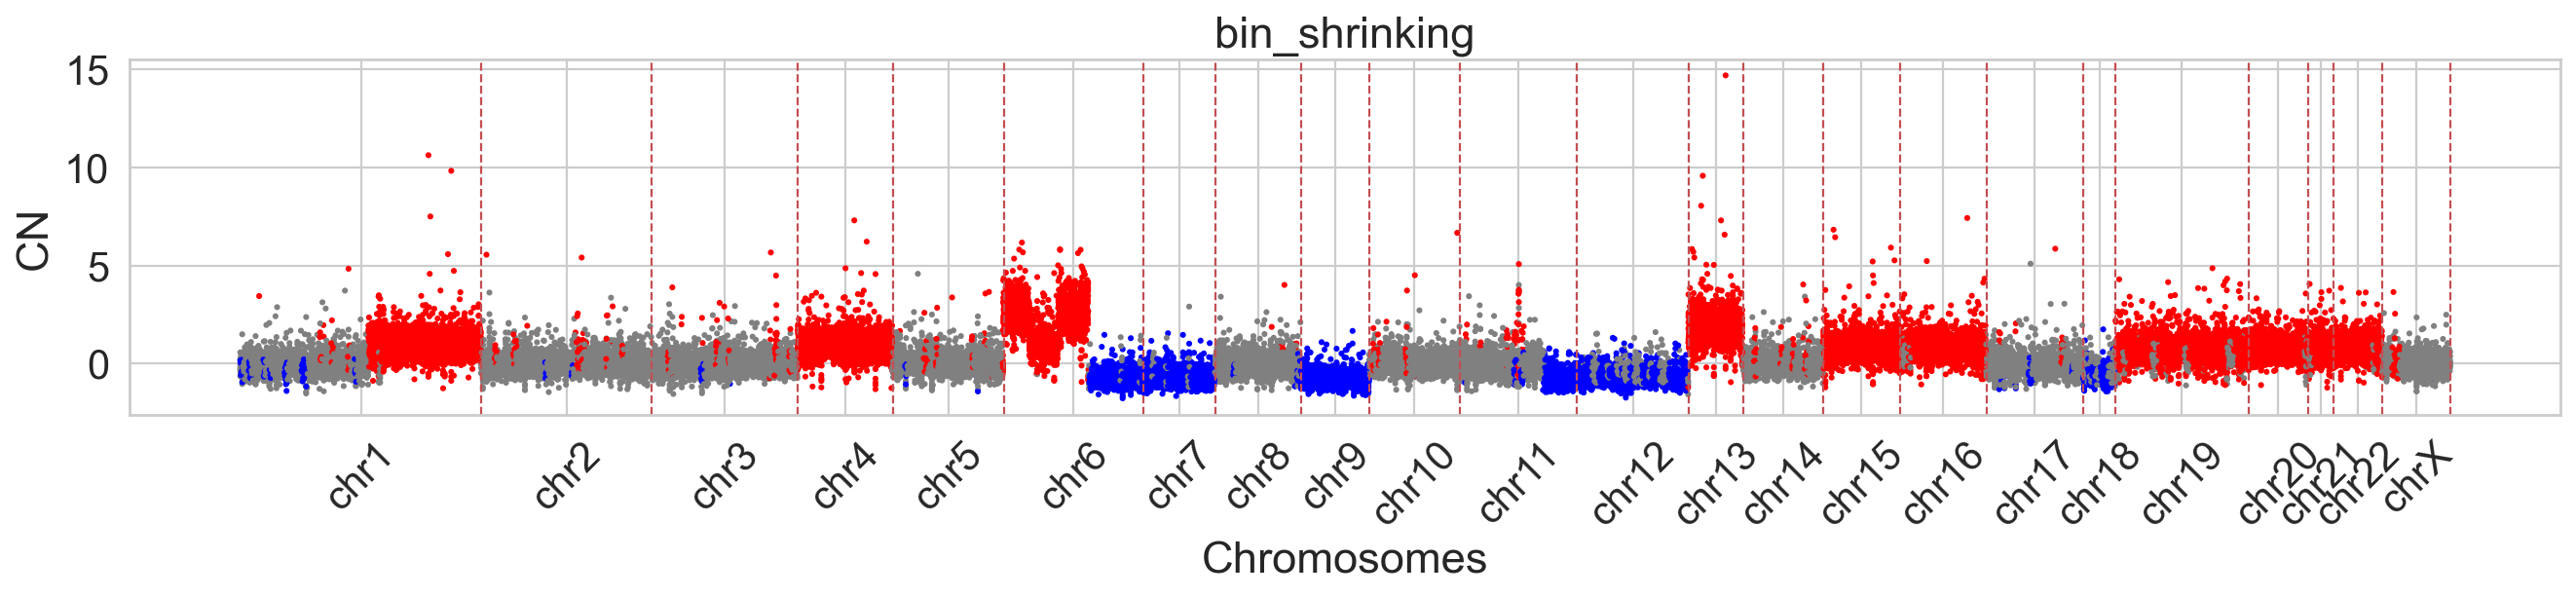

In [40]:
val_list = []
states_list = []
for i in cnvs_shrink.columns:
    vals = np.asarray(cnvs_shrink.loc[[i for i in ordered_genes if i in states.index]][i])
    val_list.append(vals)
    states_list.append(states_shrink[i])
    
draw_lines, chr_list, inds = eta_no_bin(cnvs_shrink["R310_0"])
plot(val_list, states_list, "bin_shrinking", draw_lines, chr_list)

2025-02-24 11:58:25,929 | INFO : maxp pruned
2025-02-24 11:58:25,930 | INFO : LTSH dropped
2025-02-24 11:58:25,930 | INFO : cmap pruned
2025-02-24 11:58:25,930 | INFO : kern dropped
2025-02-24 11:58:25,933 | INFO : post pruned
2025-02-24 11:58:25,933 | INFO : PCLT dropped
2025-02-24 11:58:25,933 | INFO : JSTF dropped
2025-02-24 11:58:25,934 | INFO : DSIG dropped
2025-02-24 11:58:25,936 | INFO : GPOS pruned
2025-02-24 11:58:25,937 | INFO : GSUB pruned
2025-02-24 11:58:25,940 | INFO : glyf pruned
2025-02-24 11:58:25,942 | INFO : Added gid0 to subset
2025-02-24 11:58:25,943 | INFO : Added first four glyphs to subset
2025-02-24 11:58:25,943 | INFO : Closing glyph list over 'GSUB': 30 glyphs before
2025-02-24 11:58:25,943 | INFO : Glyph names: ['.notdef', '.null', 'C', 'N', 'X', 'b', 'c', 'e', 'eight', 'five', 'four', 'g', 'h', 'i', 'm', 'n', 'nine', 'nonmarkingreturn', 'o', 'one', 'r', 's', 'seven', 'six', 'space', 'three', 'two', 'underscore', 'w', 'zero']
2025-02-24 11:58:25,944 | INFO :

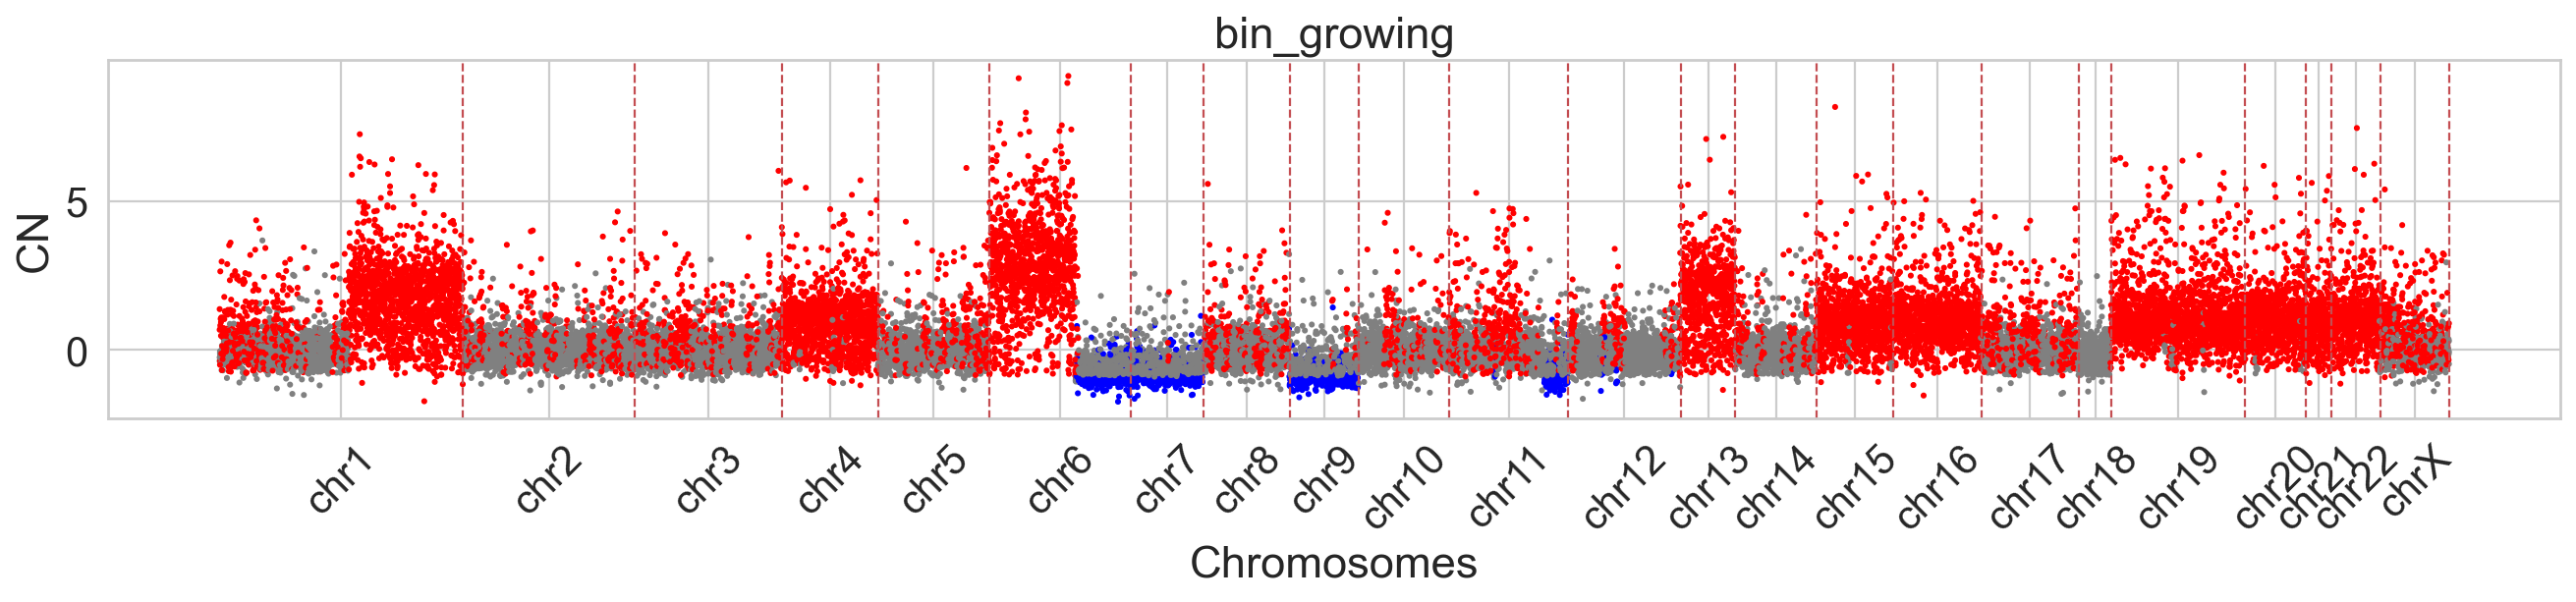

In [42]:
val_list = []
states_list = []
for i in cnvs_grow.columns:
    vals = np.asarray(cnvs_grow.loc[[i for i in ordered_genes if i in states.index]][i])
    val_list.append(vals)
    states_list.append(states_grow[i])
    
draw_lines, chr_list, inds = eta_no_bin(cnvs_grow["R310_5"])
plot(val_list, states_list, "bin_growing", draw_lines, chr_list)

In [24]:
def plot(vals_list, states_list, title, draw_lines, chrs):
    '''
    plot the CNV states along the genome
    vals: ordered copy number values (from bin_by_bands function)
    states: CN state calls from the HMM (get_states function)
    title: title of the figure, for saving
    draw_lines: coordinates of the end of each chromosome (from bin_by_bands)
    chrs: chromosome names (from bin_by_bands)
    '''
    plt.figure(figsize=(20,3))
    bar_width = 0.8
    
    for i in range(len(vals_list)):
        # Calculate the x positions for the bars
        vals = vals_list[i]
        states = states_list[i]
        x_positions = np.arange(len(vals))
        
        flipped = []
        for i in states:
            if i==0:
                flipped.append('grey')
            elif i==1:
                flipped.append('red')
            else:
                flipped.append('blue')
    
        #for i in range(len(flipped)):
        #    plt.axvline(x=x_positions[i], color=flipped[i], linestyle='-', alpha=0.01, linewidth=1)
            
        plt.scatter(x_positions, vals, c=flipped,s=3)
        
        # Set the x-axis ticks and labels
        ticks = []
        for i in range(len(draw_lines)):
            if i==0:
                ticks.append(draw_lines[i]/2)
            else:
                ticks.append(draw_lines[i-1]+(draw_lines[i]-draw_lines[i-1])/2)

    plt.xticks(ticks=ticks, labels=chrs, rotation=45)
    
    for x in draw_lines:
        plt.axvline(x=x, color='r', linestyle='--', linewidth=1)  # Draw vertical line at each x-coordinate
        
    plt.xlabel('Chromosomes')
    plt.ylabel('CN')
    plt.title(title)
    plt.grid(True)
    plt.savefig("FIGURES1/"+title+".pdf",format="pdf", dpi=300, bbox_inches='tight')
    plt.show()

In [33]:
np.asarray(val_list).shape

(8, 6779)

In [35]:
np.asarray(states_list).shape

(8, 6778)